# Super Market sales analysis


In [ ]:
### installing required packages

install.packages('psych')
install.packages("corrplot")
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
library(psych)
library(ggplot2)
library(corrplot)
library(tidyverse)
library(car)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


corrplot 0.92 loaded

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ purrr::%||%()    masks base::%||%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:psych’:

    l

In [ ]:
data1 <- read.csv('/content/supermarket_sales.csv') ### Loading the Dataset

In [ ]:
head(data1)

,Invoice.ID,Branch,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
3,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
5,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1


In [ ]:
describe(data1) ## Understanding the data

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Invoice.ID*,1,1000,500.500000,288.8194361,500.500000,500.500000,370.65000,1.000000,1000.000000,999.0000,0.000000000,-1.20360060,9.13327251
Branch*,2,1000,1.988000,0.8176335,2.000000,1.985000,1.48260,1.000000,3.000000,2.0000,0.022035066,-1.50533975,0.02585584
City*,3,1000,2.008000,0.8201272,2.000000,2.010000,1.48260,1.000000,3.000000,2.0000,-0.014732802,-1.51459204,0.02593470
Customer.type*,4,1000,1.499000,0.5002492,1.000000,1.498750,0.00000,1.000000,2.000000,1.0000,0.003994009,-2.00198303,0.01581927
Gender*,5,1000,1.499000,0.5002492,1.000000,1.498750,0.00000,1.000000,2.000000,1.0000,0.003994009,-2.00198303,0.01581927
Product.line*,6,1000,3.452000,1.7154121,3.000000,3.440000,1.48260,1.000000,6.000000,5.0000,0.058921626,-1.28239376,0.05424609
Unit.price,7,1000,55.672130,26.4946283,55.230000,55.617800,33.36591,10.080000,99.960000,89.8800,0.007056230,-1.22206222,0.83783371
Quantity,8,1000,5.510000,2.9234306,5.000000,5.512500,2.96520,1.000000,10.000000,9.0000,0.012902251,-1.21903927,0.09244699
Tax.5.,9,1000,15.379369,11.7088255,12.088000,13.995553,11.13247,0.508500,49.650000,49.1415,0.889893881,-0.09329206,0.37026557


In [ ]:
### Preprocessing data

### Removing unwanted columns such as Invoice ID , Branch

data1 <- data1[, !colnames(data1) %in% c("Branch", "Invoice.ID")]

In [ ]:
sum(is.na(data1)) ## Check for Missing values

[1] 0

## EDA

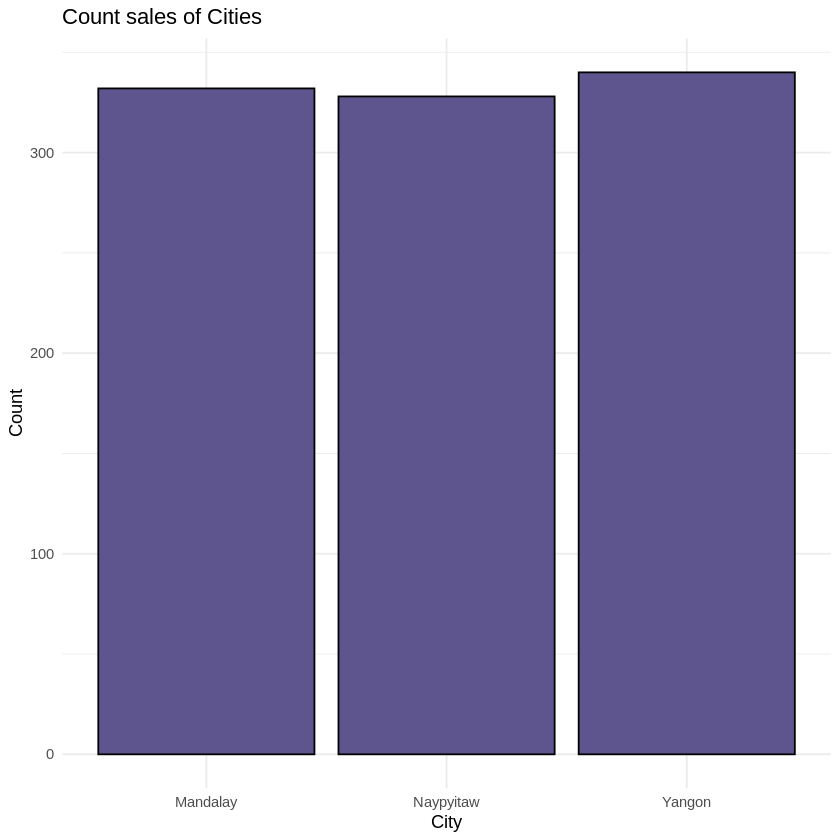

In [ ]:
### City with top sales

ggplot(data1, aes(x = City)) +
  geom_bar(fill = "#5e548e", color = "black") +
  labs(title = "Count sales of Cities", x = "City", y = "Count") +
  theme_minimal()

While the graph suggests a balanced distribution of sales volume across all cities, further analysis is needed to discern variations in gross income among these cities. Examining the data more comprehensively will allow us to uncover any disparities in the financial performance of sales across the mentioned cities

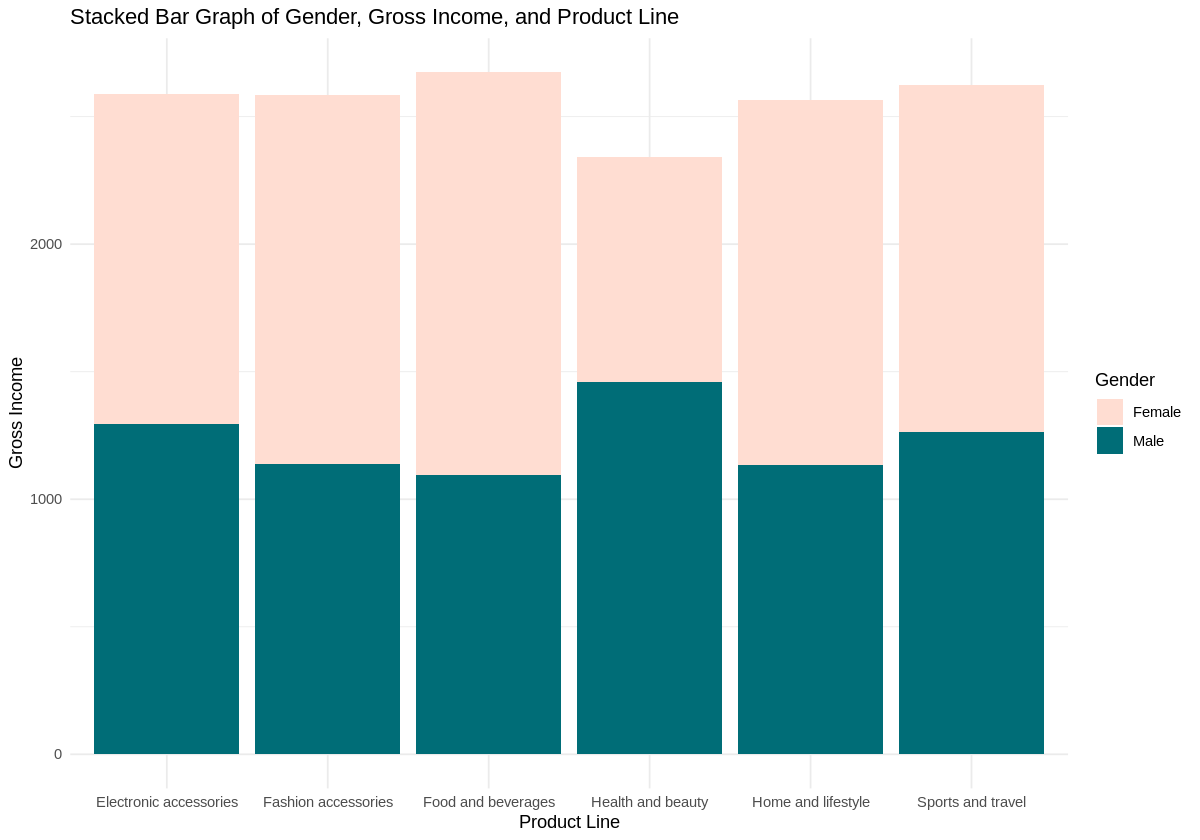

In [ ]:
#### Gender Vs product category

custom_colors <- c("Male" = "#006d77", "Female" = "#ffddd2")


options(repr.plot.width = 10, repr.plot.height =7)

ggplot(data1, aes(fill = Gender, y = gross.income, x = Product.line)) +
  geom_bar(position = "stack", stat = "identity") +
   scale_fill_manual(values = custom_colors) +
  labs(title = "Stacked Bar Graph of Gender, Gross Income, and Product Line",
       x = "Product Line", y = "Gross Income", fill = "Gender") +
  theme_minimal()

The graph suggests a relationship between gender and product line preferences, and conducting statistical tests would further validate these findings and provide insights into the significance of these differences.

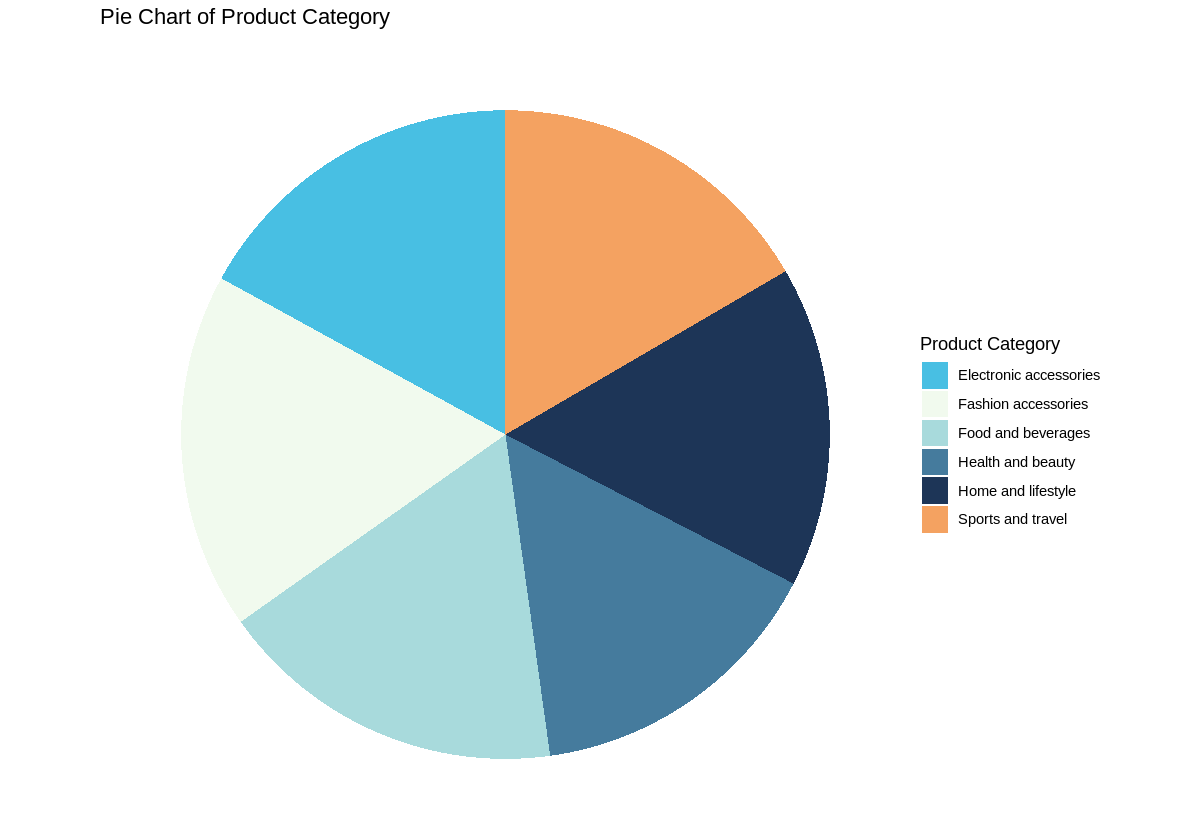

In [ ]:
## Product cateogry Distribution
custom_palette <- c("#48bfe3", "#F1FAEE", "#A8DADC", "#457B9D", "#1D3557", "#F4A261")

ggplot(data1, aes(x = "", fill = Product.line)) +
  geom_bar(width = 1, stat = "count") +
  coord_polar(theta = "y") +
  scale_fill_manual(values = custom_palette) +
  labs(title = "Pie Chart of Product Category", fill = "Product Category") +
  theme_void()

 The pie chart provides a clear overview of the product category distribution in the supermarket store across different cities. We can also infer that there is equal number of sales in the different categories in all the Branches.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


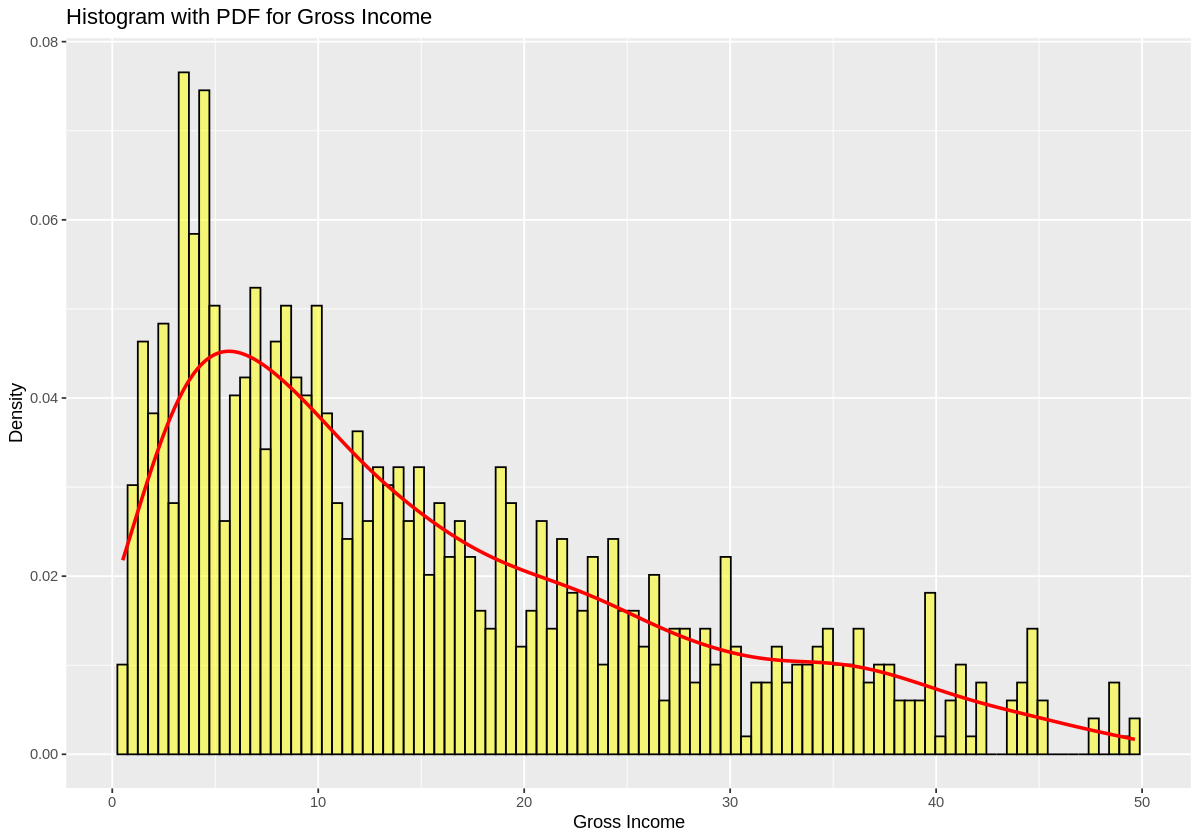

In [ ]:
## Gross Income Distribution
ggplot(data1, aes(x = gross.income)) +
  geom_histogram(aes(y = ..density..), bins = 100, fill = "yellow", color = "black", alpha = 0.5) +
  geom_density(color = "red", size = 1) +
  labs(title = "Histogram with PDF for Gross Income",
       x = "Gross Income", y = "Density")

We can infer the distribution of the gross income from  the above the density graph , which is poisson.The Poisson distribution observed in the density graph helps us understand the distribution pattern of gross income, including central tendency which is Median in this case, rare income events, and the probability density of different income levels within the dataset

In [ ]:
### Preprocessing for temporal plots
data1$Date <- as.Date(data1$Date , format = '%m/%d/%y')
data1$DayOfWeek <- weekdays(data1$Date)

In [ ]:
# Aggregate data by day
daily_sales <- data1 %>%
  group_by(Date, DayOfWeek) %>%
  summarise(TotalDailySales = sum(gross.income), .groups = 'drop')

In [ ]:
split_date <- strsplit(data1$Time, ":")

first_part <- sapply(split_date, function(x) x[1])

data1$Hour <- first_part

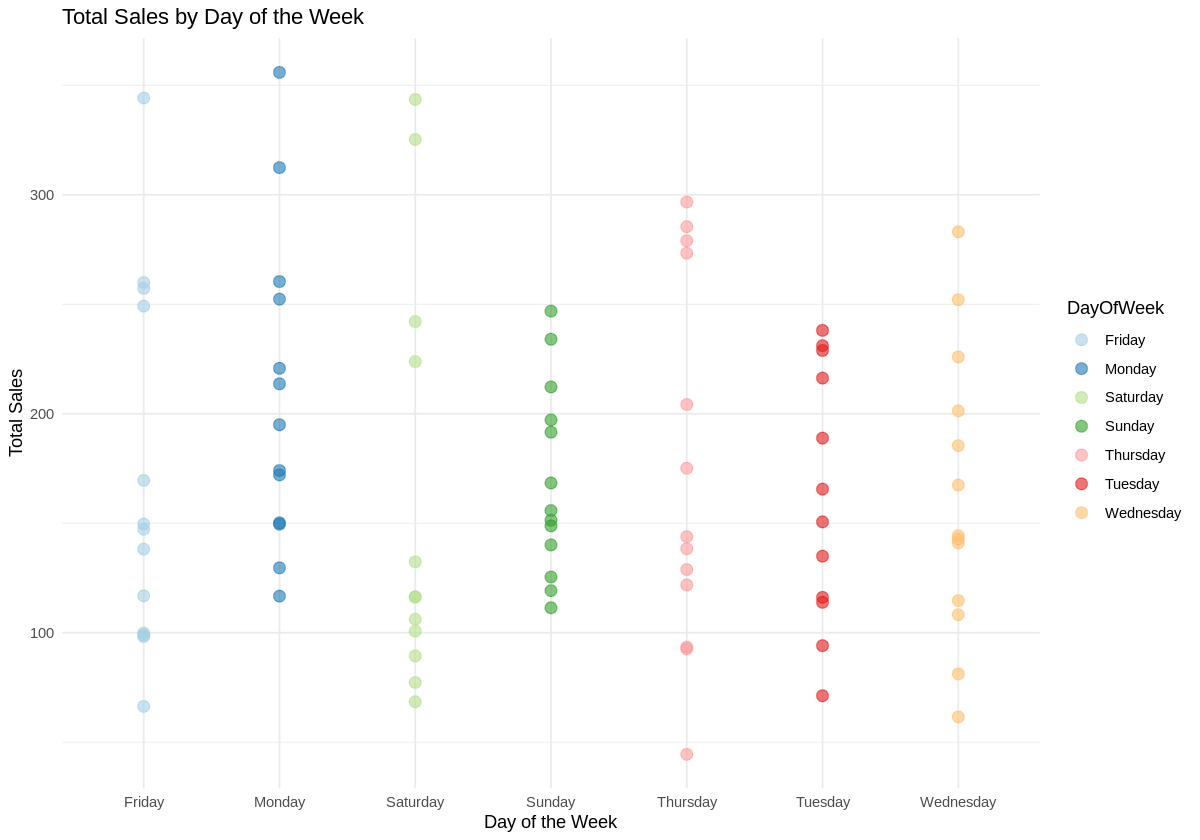

In [ ]:
ggplot(daily_sales, aes(x = DayOfWeek, y = TotalDailySales)) +
  geom_point(aes(color = DayOfWeek), size = 3, alpha = 0.6) +
  labs(title = "Total Sales by Day of the Week", x = "Day of the Week", y = "Total Sales") +
  theme_minimal() +
  scale_color_brewer(palette = "Paired")

In [ ]:
# Aggregate data by Hour
hourly_sales <- data1 %>%
  group_by(Hour) %>%
  summarise(TotalHourlySales = sum(gross.income), .groups = 'drop')

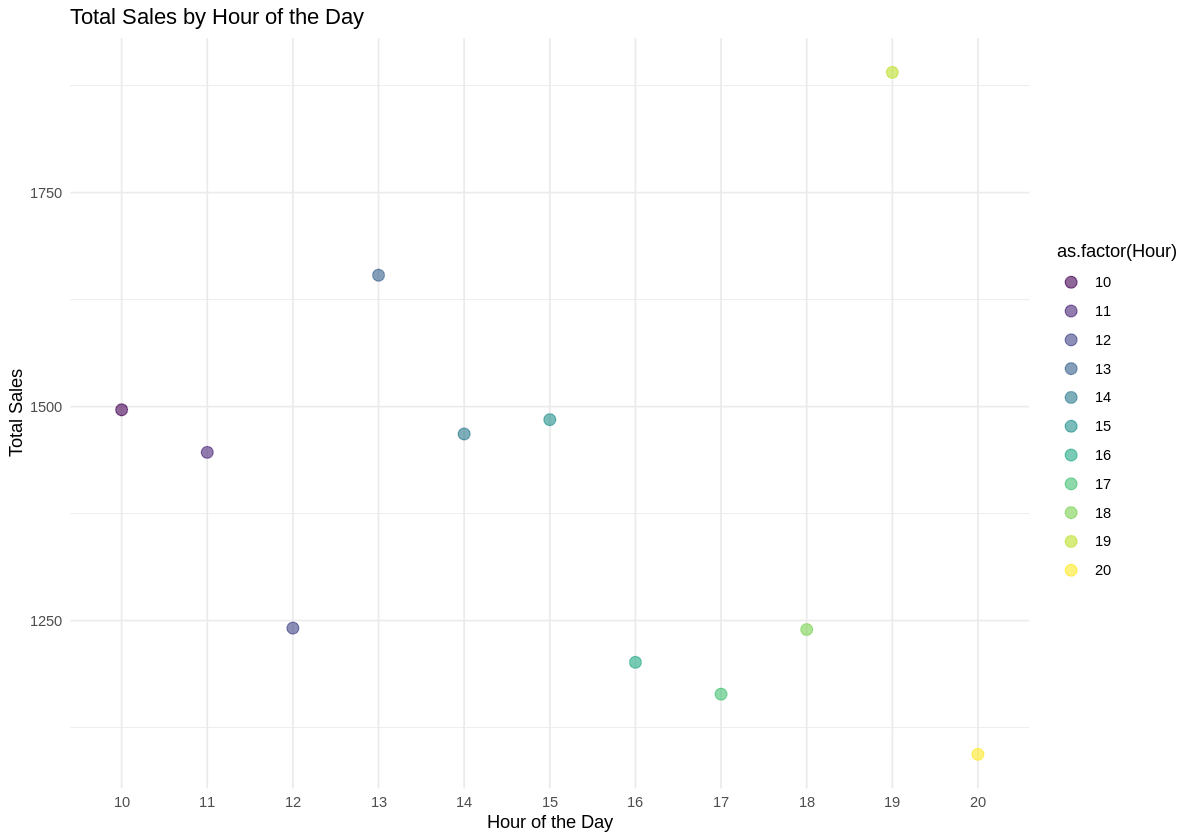

In [ ]:
# Plot Total Sales by Hour of the Day
ggplot(hourly_sales, aes(x = Hour, y = TotalHourlySales)) +
  geom_point(aes(color = as.factor(Hour)), size = 3, alpha = 0.6) +
  labs(title = "Total Sales by Hour of the Day", x = "Hour of the Day", y = "Total Sales") +
  theme_minimal() +
  scale_color_viridis_d()

The consistent peak of sales at 19 (7 pm) and during Monday , Friday and Saturday across all branches highlights a significant time for customer engagement and transaction activity, offering opportunities for businesses to enhance operations and maximize sales potential

## Statistical Testing

### 1. Gender Vs Product Line




 NULL HYPOTHESIS (H0) : There is no significant difference in the purchasing behavior between genders across different product lines.
 ALTERNATE  HYPOTHESIS (H1) : There is a significant difference in the purchasing behavior between genders across different product lines.

Test statistic : Chi-square test statistic assesses the association between categorical variables by comparing observed and expected frequencies.

In [ ]:

contingency_table <- table(data1$Gender, data1$Product.line)

chi_sq_test <- chisq.test(contingency_table)

print(chi_sq_test)



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 5.7445, df = 5, p-value = 0.3319



The chi-squared test results in a p-value of 0.3319.
With a p-value greater than the  significance level of 0.05 (assuming a 95% confidence level), we do not have enough evidence to reject the null hypothesis.

Thus we can conclude that we do not have evidence to say that there is no significant difference in the purchasing behaviour of genders and the Product Category.

#### Since there is no difference in purchasing behaviour of Male and  Female and a particular product Category , considering another hypothesis which can help us understand the Customer Behaviour

 NULL HYPOTHESIS (H0) : There is no difference in the average number of units purchased from the "Fashion accessories" product line between male and female customers.

 ALTERNATE  HYPOTHESIS (H1) : There is a difference in the average number of units purchased from the "Fashion accessories" product line between male and female customers.

This hypothesis is interesting because consumer behavior studies often show gender differences in shopping preferences, especially in categories like fashion.

Test Statistic : T-test statistic measures the difference between sample means relative to the variability within the samples, indicating whether this difference is statistically significant.

In [ ]:
# Filter for 'Fashion accessories' and group by 'Gender'
fashion_data <- subset(data1, Product.line == "Fashion accessories")
male_fashion <- subset(fashion_data, Gender == "Male")$Quantity
female_fashion <- subset(fashion_data, Gender == "Female")$Quantity

# Perform t-test between male and female customers for 'Fashion accessories'
t_test_result <- t.test(male_fashion, female_fashion)


print(t_test_result)


	Welch Two Sample t-test

data:  male_fashion and female_fashion
t = -2.1136, df = 164.76, p-value = 0.03605
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.90368739 -0.06480855
sample estimates:
mean of x mean of y 
 4.536585  5.520833 



From above we can see that ,
t-value: The t-value is approximately -2.1136.
Degrees of Freedom (df): The degrees of freedom are estimated to be approximately 164.76.
p-value: The p-value associated with the test is approximately 0.03605.

Since the t- value is less than 0 , which means that the mean of male category is less than the female category and the p-value of 0.03605 is less than the significance level of 0.05.Therefore, we reject the null hypothesis at the 0.05 significance level.This suggests that there is statistically significant evidence to conclude that the true difference in the average number of units purchased from the "Fashion accessories" product line between male and female customers.


### 2. Payment Method Differences in Total Sales


 NULL HYPOTHESIS (H0) :  There is no difference in the average total sales across the different payment methods.

 ALTERNATE  HYPOTHESIS (H1) : There are differences in the average total sales across the different payment methods.

 Test Statistic : ANOVA uses the F-test statistic to assess whether there are significant differences in means across multiple groups.

In [ ]:
# ANOVA to compare average total sales across different payment methods
anova_result <- aov(gross.income ~ Payment, data = data1)

# summary of the ANOVA test
summary(anova_result)

             Df Sum Sq Mean Sq F value Pr(>F)
Payment       2     22   11.14   0.081  0.922
Residuals   997 136937  137.35               

Since the p-value (0.922) is much greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in total sales among the different payment methods.

However, it's important to note that statistical tests are sensitive to sample size and data quality. In this case, with a larger dataset or considering additional factors, there might be a possibility of detecting more subtle differences in the impact of payment methods on sales.

In conclusion, while the current analysis does not show a significant difference, continuous improvement and evaluation of all payment methods remain important as each method contributes to the overall customer experience and business performance.

#### 3. Gross Income In Different Cities

NULL HYPOTHESIS (H0) : There is no significant difference in average gross income between customers from different cities.

ALTERNATE  HYPOTHESIS (H1) : There is no significant difference in average gross income between customers from different cities.

In [ ]:
anova_result <- aov(gross.income ~ City, data = data1)

summary(anova_result)

             Df Sum Sq Mean Sq F value Pr(>F)
City          2    243   121.3   0.885  0.413
Residuals   997 136717   137.1               

Based on the ANOVA results,where p-value 0.413 , is more than 0.05 (assuming 95% confidence interval) there is no statistically significant difference in average gross income between customers from different cities. The analysis suggests that the city of residence does not have a significant impact on the average gross income of customers, based on the  data.


This suggests that each store performs equally well in terms of average gross income, with no significant variations in profits among the stores. Therefore, all stores demonstrate consistent and significant profitability, regardless of the city in which they are located.

### Comparing the NPS score across Each City (using Bootstraping)


The aim of this study is to evaluate the sentiment towards
 products in different cities using the Net Promoter Score (NPS) metric. NPS is a widely recognized measure of customer satisfaction and loyalty, particularly in the context of super market store sales where ratings heavily influence purchasing decisions. We try to compare the mean NPS scores across various cities to identify locations with the most positive and negative sentiments towards Customer satisfaction and sentiment.

Here's how the NPS is computed from a survey like the one above:
* We call a specific response a **"promoter"** if the rating given is 8 ,  9 or 10
* We call a response a **"detractor"** if the rating given is 5 or below
* We call a response neutral if the rating is 6 or 7

$$NPS = \frac{\text{number of promoters}-\text{number of detractors}}{\text{total number of responses}} * 100$$

So for example if the sample of responses to the survey is
```
10, 9, 3, 4, 7, 9, 8, 7, 2, 7
```
then we have 4 promoters (scores `10,9,8,9`) and 3 detractors (scores `3,4,2`), and  3 neutral responses, therefore

$$NPS = \frac{4 - 3}{10}*100 = 10$$

Notice that NPS can range from -100 (all responses are detractors) to 100 (all responses are promoters). Positive NPS generally signifies positive sentiment, and one of the company's objectives can be to maximize it.

NPS is supposed to measure the general customer sentiment and loyalty towards the product, but only a small subset of people usually fill the survey, so we can use **inference techniques** to estimate what the general sentiment is based on the NPS from the sample.

In [ ]:
### Calculate the NPS Score

nps <- function(a) {

  p <- 0
  d <- 0
  for (x in a) {
  if (x > 7 ){
    p <- p +1
  }
  else if (x < 5 ){
    d <- d +1
  }
}

nps_score <- ((p - d) ) / length(a) *100

return(nps_score)
}

In [ ]:
data1$Rating <- round(data1$Rating)

In [ ]:
#### Compute the NPS score in Each City

city_Yangon = data1[data1$City == "Yangon" , "Rating"]

city_nps_yangon = nps(city_Yangon)

cat("The Nps Score in the City Yangon:",city_nps_yangon,'\n' )


city_Naypyitaw = data1[data1$City == "Naypyitaw" , "Rating"]

city_nps_Naypyitaw = nps(city_Naypyitaw)

cat("The Nps Score in  the City Naypyitaw:",city_nps_Naypyitaw ,'\n' )


city_Mandalay = data1[data1$City == "Mandalay" , "Rating"]

city_nps_Mandalay = nps(city_Mandalay)

cat("The Nps Score  in the City Mandalay:",city_nps_Mandalay,'\n'  )

The Nps Score in the City Yangon: 31.47059 
The Nps Score in  the City Naypyitaw: 35.06098 
The Nps Score  in the City Mandalay: 26.80723 


In [ ]:
#### Bootstraping 3000 samples in each City
samples <- replicate(3000 , sample(city_Mandalay, replace = TRUE, size = length(city_Mandalay)))
bootstrap_nps_Mandalay <- apply(samples, 2, nps)


samples <- replicate(3000 , sample(city_Naypyitaw, replace = TRUE, size = length(city_Naypyitaw)))
bootstrap_nps_Naypyitaw <- apply(samples, 2, nps)


samples <- replicate(3000 , sample(city_Yangon, replace = TRUE, size = length(city_Yangon)))
bootstrap_nps_Yangon <- apply(samples, 2, nps)


When reporting business metrics such as Net Promoter Scores (NPS) derived from samples, it's crucial to include the margin of error or confidence interval. This information provides a range within which the true population metric is likely to fall, enhancing the metric's reliability and the degree of uncertainty associated with the sample-based estimate.

### Confidence interval of NPS Score in Yangon

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


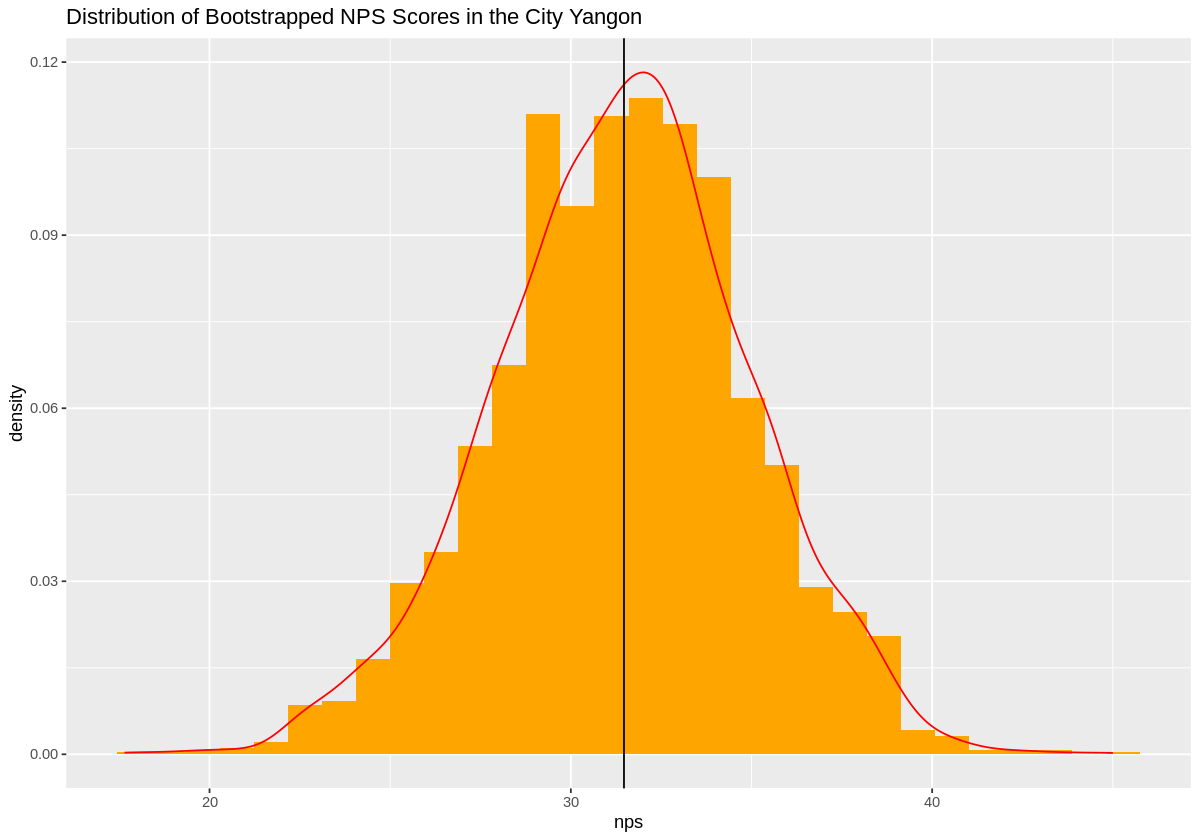

In [ ]:
ggplot(data.frame(nps = bootstrap_nps_Yangon), aes(x = nps)) +
  geom_histogram(aes(y = after_stat(density)), fill = "orange") +
  geom_density(color = 'red') +
  geom_vline(xintercept = city_nps_yangon) +
  labs(title = "Distribution of Bootstrapped NPS Scores in the City Yangon")

In [ ]:
lb_Y <- quantile(bootstrap_nps_Yangon, 0.025)
up_Y <- quantile(bootstrap_nps_Yangon, 0.975)

cat("Lower limit of the Confidence interval:" , lb_Y , '\n')
cat("Upper limit of the confidence interval:", up_Y)

Lower limit of the Confidence interval: 24.11765 
Upper limit of the confidence interval: 38.23529

In [ ]:
diff_lower <- city_nps_yangon - lb_Y
diff_upper <- up_Y - city_nps_yangon
cat('Diff lower limit with the original sample NPS' , diff_lower , '\n')
cat('Diff upper limit with the original sample NPS' , diff_upper)

Diff lower limit with the original sample NPS 7.352941 
Diff upper limit with the original sample NPS 6.764706

We can infer that the difference in the values of the upper limit and the lower limit are not same , as the graph is not symmetrical as a normal distribution. Though the graph approximates the normal distribution , it still lacks symmetry slightly . This may be due to the number of samples that we use for bootstrapping. Thus as we take more and more samples (>3000) we can make sure that values become equal and follows a normal distribution , with symmetry.

### Confidence interval of NPS Score in Naypyitaw

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


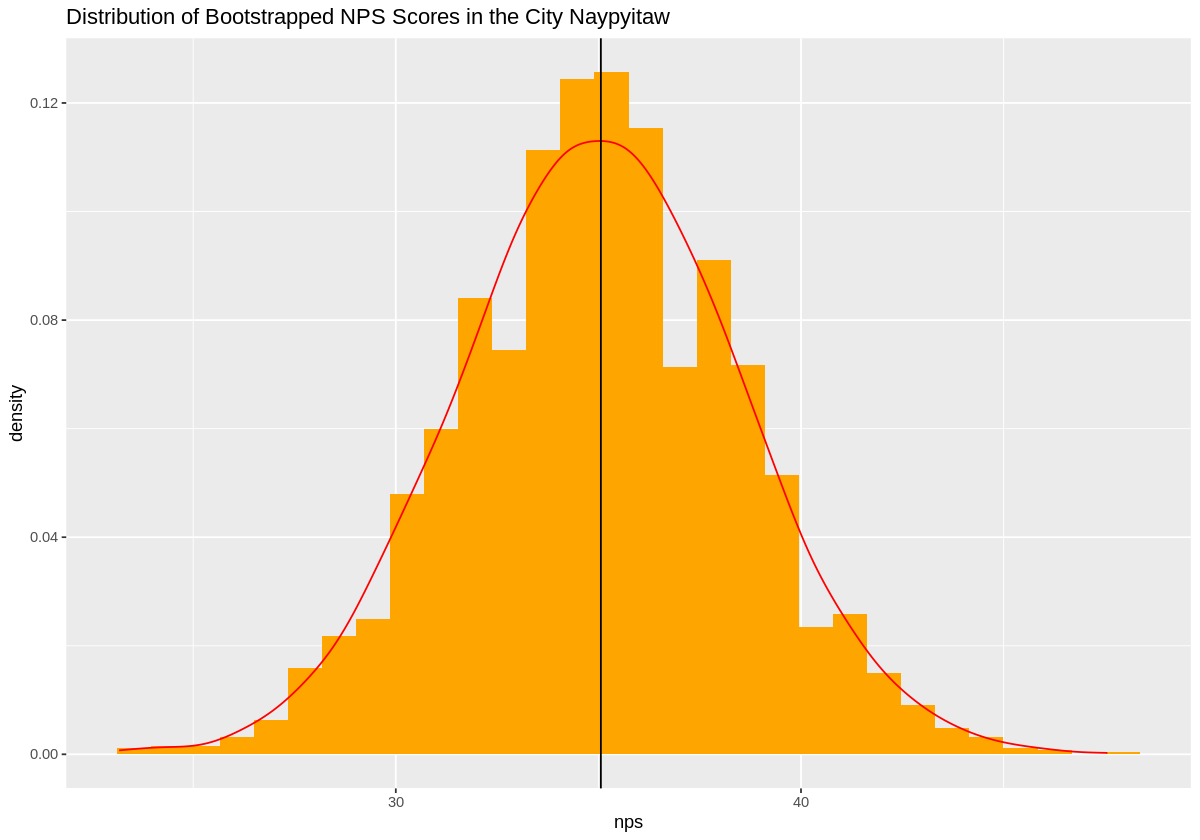

In [ ]:
ggplot(data.frame(nps = bootstrap_nps_Naypyitaw), aes(x = nps)) +
  geom_histogram(aes(y = after_stat(density)), fill = "orange") +
  geom_density(color = 'red') +
  geom_vline(xintercept = city_nps_Naypyitaw) +
  labs(title = "Distribution of Bootstrapped NPS Scores in the City Naypyitaw")



In [ ]:
lb_N <- quantile(bootstrap_nps_Naypyitaw, 0.025)
up_N <- quantile(bootstrap_nps_Naypyitaw, 0.975)

cat("Lower limit of the Confidence interval:" , lb_N , '\n')
cat("Upper limit of the confidence interval:", up_N)

Lower limit of the Confidence interval: 28.34604 
Upper limit of the confidence interval: 41.76829

In [ ]:
diff_lower <- city_nps_Naypyitaw  - lb_N
diff_upper <- up_N - city_nps_Naypyitaw
cat('Diff lower limit with the original sample NPS' , diff_lower , '\n')
cat('Diff upper limit with the original sample NPS' , diff_upper)

Diff lower limit with the original sample NPS 6.714939 
Diff upper limit with the original sample NPS 6.707317

We can infer that the difference in the values of the upper limit and the lower limit are not same , as the graph is not symmetrical as a normal distribution. Though the graph approximates the normal distribution , it still lacks symmetry slightly . This may be due to the number of samples that we use for bootstrapping. Thus as we take more and more samples (>3000) we can make sure that values become equal and follows a normal distribution , with symmetry.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


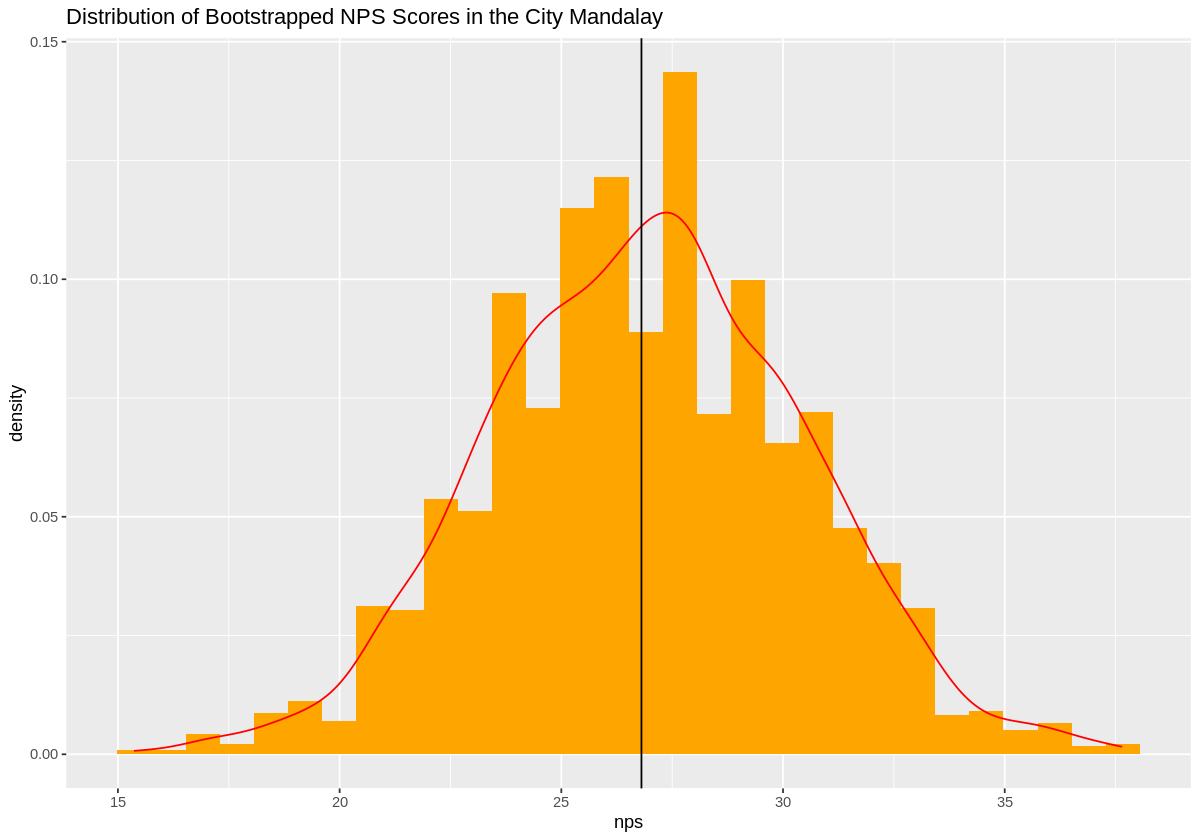

In [ ]:
ggplot(data.frame(nps = bootstrap_nps_Mandalay), aes(x = nps)) +
  geom_histogram(aes(y = after_stat(density)), fill = "orange") +
  geom_density(color = 'red') +
  geom_vline(xintercept = city_nps_Mandalay) +
  labs(title = "Distribution of Bootstrapped NPS Scores in the City Mandalay")

In [ ]:
lb_M <- quantile(bootstrap_nps_Mandalay, 0.025)
up_M <- quantile(bootstrap_nps_Mandalay, 0.975)

cat("Lower limit of the Confidence interval:" , lb_M , '\n')
cat("Upper limit of the confidence interval:", up_M)

Lower limit of the Confidence interval: 20.18072 
Upper limit of the confidence interval: 33.73494

In [ ]:
diff_lower <- city_nps_Mandalay  - lb_M
diff_upper <- up_M - city_nps_Mandalay
cat('Diff lower limit with the original sample NPS' , diff_lower , '\n')
cat('Diff upper limit with the original sample NPS' , diff_upper)

Diff lower limit with the original sample NPS 6.626506 
Diff upper limit with the original sample NPS 6.927711

We can infer that the difference in the values of the upper limit and the lower limit are not same , as the graph is not symmetrical as a normal distribution. Though the graph approximates the normal distribution , it still lacks symmetry slightly . This may be due to the number of samples that we use for bootstrapping. Thus as we take more and more samples (>3000) we can make sure that values become equal and follows a normal distribution , with symmetry.

### Comparing the confidence Interval of NPS score in each City

In [ ]:
cat("95% Confidence Interval of NPS Score in City Yangon(",lb_Y,",",up_Y,") \n")
cat("95% Confidence Interval of NPS Score in City Naypyitaw(",lb_N,",",up_N,") \n")
cat("95% Confidence Interval of NPS Score in City Mandalay(",lb_M,",",up_M,")")

95% Confidence Interval of NPS Score in City Yangon( 24.11765 , 38.23529 ) 
95% Confidence Interval of NPS Score in City Naypyitaw( 28.34604 , 41.76829 ) 
95% Confidence Interval of NPS Score in City Mandalay( 20.18072 , 33.73494 )

Based on the analysis of the confidence intervals for the Net Promoter Scores (NPS) in Yangon, Naypyitaw, and Mandalay, several key insights can be made. Naypyitaw exhibits a narrow confidence interval with higher upper and lower bounds compared to the other cities, suggesting significantly higher ratings and customer preference for purchasing in Naypyitaw over Yangon and Mandalay. Conversely, Mandalay shows a wider confidence interval with lower upper and lower bounds, indicating greater variability and potential areas for improvement to enhance profitability and customer satisfaction. Overall, these findings underscore the importance of targeted strategies to capitalize on favorable customer sentiments in Naypyitaw while addressing challenges and enhancing performance in Mandalay to achieve competitive advantage and sustained success.

#### LINEAR REGRESSION

In [ ]:
### Data Preprocessing to run Lineat regression model
data1 <- data1[, !colnames(data1) %in% c("Date",'Time','DayOfWeek'	,'FirstPart' , 'Hour')]

In [ ]:
head(data1)

,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9
2,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,10
3,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7
4,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8
5,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5
6,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865,4


In [ ]:
## Train / Test Split for the model training and evaluation

set.seed(2327)
n <- floor(0.8 * nrow(data1))
index <- sample(seq_len(nrow(data1)), size = n)
train <- data1[index, ]
test <- data1[-index, ]
cat("There are", dim(train)[1], "rows and", dim(train)[2], "columns in the training set.\n")
cat("There are", dim(test)[1], "rows and", dim(test)[2], "columns in the testing set.\n")

There are 800 rows and 13 columns in the training set.
There are 200 rows and 13 columns in the testing set.


In [ ]:

train_new <- train

train_new$City <- as.numeric(as.factor(train_new$City))
train_new$Customer.type <- as.numeric(as.factor(train_new$Customer.type))
train_new$Gender <- as.numeric(as.factor(train_new$Gender))
train_new$Product.line <- as.numeric(as.factor(train_new$Product.line))
train_new$Payment <- as.numeric(as.factor(train_new$Payment))


In [ ]:
test_new <- test

test_new$City <- as.numeric(as.factor(test_new$City))
test_new$Customer.type <- as.numeric(as.factor(test_new$Customer.type))
test_new$Gender <- as.numeric(as.factor(test_new$Gender))
test_new$Product.line <- as.numeric(as.factor(test_new$Product.line))
test_new$Payment <- as.numeric(as.factor(test_new$Payment))

In [ ]:
head(train_new)

,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
171,3,2,2,4,70.01,5,17.5025,367.5525,3,350.05,4.761905,17.5025,6
546,1,1,2,5,38.81,4,7.7620,163.0020,3,155.24,4.761905,7.7620,5
258,3,1,2,5,25.91,6,7.7730,163.2330,3,155.46,4.761905,7.7730,9
97,1,2,2,4,87.87,10,43.9350,922.6350,3,878.70,4.761905,43.9350,5
635,1,1,2,3,79.91,3,11.9865,251.7165,2,239.73,4.761905,11.9865,5
378,2,2,2,6,95.49,7,33.4215,701.8515,3,668.43,4.761905,33.4215,9


In [ ]:
l_model <- lm(gross.income ~ ., data = train_new)

summary(l_model)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ ., data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-7.653e-16 -8.350e-17 -1.420e-17  5.990e-17  7.293e-15 

Coefficients: (3 not defined because of singularities)
                          Estimate Std. Error    t value Pr(>|t|)    
(Intercept)              0.000e+00  9.494e-17  0.000e+00    1.000    
City                     0.000e+00  1.393e-17  0.000e+00    1.000    
Customer.type            0.000e+00  2.277e-17  0.000e+00    1.000    
Gender                   0.000e+00  2.285e-17  0.000e+00    1.000    
Product.line             0.000e+00  6.617e-18  0.000e+00    1.000    
Unit.price               0.000e+00  9.184e-19  0.000e+00    1.000    
Quantity                 0.000e+00  9.117e-18  0.000e+00    1.000    
Tax.5.                   1.000e+00  2.970e-18  3.367e+17   <2e-16 ***
Total                           NA         NA         NA       NA    
Payment                 -3.812e-18  1.379e-17 -2.760e-01    0.78

The above model indicates that the presence of highly correlated features within the dataset (3 singularities mentioned in the model summary). These high correlations increases the potential for multicollinearity issues in predictive modeling or statistical analysis.

To mitigate multicollinearity effects and improve model robustness, we need to remove one feature from each highly correlated pair. By selectively removing features while retaining essential information, we can reduce redundancy and improve the interpretability and performance of predictive models.

### To find highly correlated features in the dataset

In [ ]:
head(train)

,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
171,Yangon,Normal,Male,Health and beauty,70.01,5,17.5025,367.5525,Ewallet,350.05,4.761905,17.5025,6
546,Mandalay,Member,Male,Home and lifestyle,38.81,4,7.7620,163.0020,Ewallet,155.24,4.761905,7.7620,5
258,Yangon,Member,Male,Home and lifestyle,25.91,6,7.7730,163.2330,Ewallet,155.46,4.761905,7.7730,9
97,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,Ewallet,878.70,4.761905,43.9350,5
635,Mandalay,Member,Male,Food and beverages,79.91,3,11.9865,251.7165,Credit card,239.73,4.761905,11.9865,5
378,Naypyitaw,Normal,Male,Sports and travel,95.49,7,33.4215,701.8515,Ewallet,668.43,4.761905,33.4215,9


Warning message in cor(train_new):
“the standard deviation is zero”


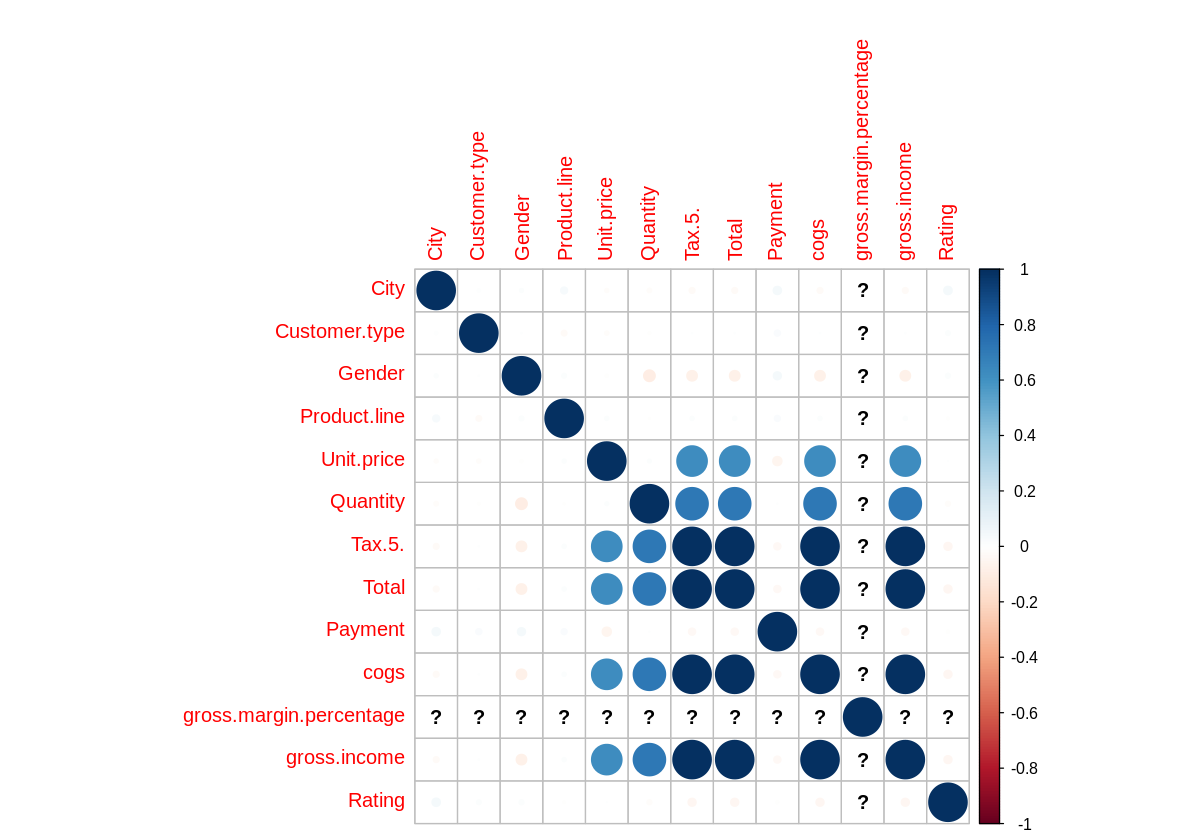

In [ ]:
cor_matrix <- cor(train_new)
corrplot(cor_matrix, method = "circle")

After identifying highly correlated features, specifically Tax.5, Cogs, and gross margin percentage, they were removed from the dataset. Subsequently, the model is retrained to improve its robustness and mitigate multicollinearity issues caused by the presence of these correlated variables.

In [ ]:
train_new <- train_new[, !colnames(train_new) %in% c("gross.margin.percentage","Tax.5.", 'cogs')]

In [ ]:
test_new <- test_new[, !colnames(test_new) %in% c("gross.margin.percentage","Tax.5.", 'cogs')]

In [ ]:
head(test_new)

,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Total,Payment,gross.income,Rating
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
5,3,2,2,6,86.31,7,634.3785,3,30.2085,5
7,3,1,1,1,68.84,6,433.6920,3,20.6520,6
9,3,1,1,4,36.26,2,76.1460,2,3.6260,7
18,3,2,2,6,72.61,6,457.4430,2,21.7830,7
23,1,2,2,5,33.20,2,69.7200,2,3.3200,4
26,3,1,1,5,52.59,8,441.7560,2,21.0360,8


In [ ]:
l_model <- lm(gross.income ~ ., data = train_new)

summary(l_model)

y_pred <- predict(l_model , test_new)

mspe <- mean((test$gross.income - y_pred)^2)
cat("MSPE Score of full model :", mspe)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ ., data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.683e-14 -1.467e-15 -2.190e-16  1.051e-15  6.791e-14 

Coefficients:
                Estimate Std. Error    t value Pr(>|t|)    
(Intercept)   -9.195e-16  1.251e-15 -7.350e-01  0.46245    
City           2.117e-16  1.835e-16  1.154e+00  0.24894    
Customer.type  3.205e-17  3.000e-16  1.070e-01  0.91494    
Gender         1.336e-15  3.010e-16  4.439e+00 1.03e-05 ***
Product.line   6.387e-17  8.717e-17  7.330e-01  0.46393    
Unit.price     3.850e-17  1.210e-17  3.182e+00  0.00152 ** 
Quantity      -3.441e-16  1.201e-16 -2.865e+00  0.00428 ** 
Total          4.762e-02  1.863e-18  2.556e+16  < 2e-16 ***
Payment        3.452e-16  1.817e-16  1.900e+00  0.05780 .  
Rating        -8.926e-17  8.292e-17 -1.076e+00  0.28204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.233e-15 on 790 degrees of freedom
Multiple R-squar

MSPE Score of full model : 9.497331e-30

## Dubrin Watson Test

The Durbin-Watson (D-W) statistic is a test for autocorrelation in the residuals of a regression model. The D-W statistic ranges from 0 to 4, where:

D-W close to 2 indicates no autocorrelation (residuals are independent).
D-W significantly less than 2 indicates positive autocorrelation (residuals are positively correlated).
D-W significantly greater than 2 indicates negative autocorrelation (residuals are negatively correlated).

Null Hypothesis (H0): There is no autocorrelation in the residuals of the regression model.

Alternative Hypothesis (H1): There is positive autocorrelation in the residuals of the regression model.

In [ ]:
dw_test <- durbinWatsonTest(l_model)
dw_test

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”


 lag Autocorrelation D-W Statistic p-value
   1     -0.05408158      1.782351   0.258
 Alternative hypothesis: rho != 0

The Durbin-Watson statistic is slightly less than 2, suggesting a slight positive autocorrelation tendency (although not significantly strong).
The p-value of 0.018 is less than the typical significance level of 0.05, indicating that there is evidence to reject the null hypothesis of no  autocorrelation.

### Backward Selection to find the best model
###### We can use the `update()` function to perform backward selection (the critical value is  $\alpha_{crit} = 0.15$). At each step of backward selection, calculating the mean squared prediction error (MSPE) on the test set.

In [ ]:
### Removing Customer.type from the base model since it has higher p-value

l_model <- update(l_model , ~ . -Customer.type )

summary(l_model)

y_pred <- predict(l_model , test_new)

mspe1 <- mean((test$gross.income - y_pred)^2)
cat("MSPE Score of the model :", mspe1)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ City + Gender + Product.line + Unit.price + 
    Quantity + Total + Payment + Rating, data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.101e-13 -1.053e-15 -9.900e-17  9.870e-16  6.103e-14 

Coefficients:
               Estimate Std. Error    t value Pr(>|t|)    
(Intercept)   7.947e-15  1.460e-15  5.444e+00 6.97e-08 ***
City          2.574e-16  2.306e-16  1.116e+00    0.265    
Gender        1.302e-16  3.783e-16  3.440e-01    0.731    
Product.line  1.566e-16  1.095e-16  1.430e+00    0.153    
Unit.price    2.423e-18  1.519e-17  1.600e-01    0.873    
Quantity     -2.065e-15  1.508e-16 -1.370e+01  < 2e-16 ***
Total         4.762e-02  2.339e-18  2.036e+16  < 2e-16 ***
Payment      -8.278e-17  2.282e-16 -3.630e-01    0.717    
Rating       -1.264e-16  1.042e-16 -1.213e+00    0.225    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.32e-15 on 791 degrees of freedom
Mult

MSPE Score of the model : 2.581806e-29

In [ ]:
### Removing payment from the base model since it has higher p-value

l_model <- update(l_model , ~ . -Unit.price )

summary(l_model)


y_pred <- predict(l_model , test_new)

mspe2 <- mean((test$gross.income - y_pred)^2)
cat("MSPE Score of the model :", mspe2)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ City + Gender + Product.line + Quantity + 
    Total + Payment + Rating, data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.147e-13 -1.064e-15 -3.000e-18  1.104e-15  6.186e-14 

Coefficients:
               Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  -4.194e-15  1.218e-15 -3.442e+00 0.000608 ***
City          2.069e-16  2.280e-16  9.070e-01 0.364460    
Gender        9.837e-16  3.741e-16  2.630e+00 0.008716 ** 
Product.line  2.242e-16  1.083e-16  2.070e+00 0.038748 *  
Quantity      1.376e-15  9.031e-17  1.524e+01  < 2e-16 ***
Total         4.762e-02  1.088e-18  4.378e+16  < 2e-16 ***
Payment       7.758e-18  2.256e-16  3.400e-02 0.972575    
Rating       -1.039e-16  1.026e-16 -1.012e+00 0.311700    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.26e-15 on 792 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 5.557e+

MSPE Score of the model : 1.258091e-29

In [ ]:
### Removing Payment from the base model since it has higher p-value

l_model <- update(l_model , ~ . -Payment )

summary(l_model)


y_pred <- predict(l_model , test_new)

mspe3 <- mean((test$gross.income - y_pred)^2)
cat("MSPE Score of the model :", mspe3)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ City + Gender + Product.line + Quantity + 
    Total + Rating, data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.147e-13 -1.063e-15 -3.000e-18  1.108e-15  6.187e-14 

Coefficients:
               Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  -4.194e-15  1.148e-15 -3.653e+00 0.000276 ***
City          2.069e-16  2.276e-16  9.090e-01 0.363649    
Gender        9.837e-16  3.735e-16  2.634e+00 0.008608 ** 
Product.line  2.242e-16  1.082e-16  2.072e+00 0.038564 *  
Quantity      1.376e-15  9.018e-17  1.526e+01  < 2e-16 ***
Total         4.762e-02  1.085e-18  4.387e+16  < 2e-16 ***
Rating       -1.039e-16  1.026e-16 -1.014e+00 0.311112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.257e-15 on 793 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 6.491e+32 on 6 and 793 DF,  p-value: < 2.2e-16


MSPE Score of the model : 1.231591e-29

In [ ]:
### Removing City from the base model since it has higher p-value

l_model <- update(l_model , ~ . -City)

summary(l_model)

y_pred <- predict(l_model , test_new)

mspe4 <- mean((test$gross.income - y_pred)^2)
cat("MSPE Score of the model :", mspe4)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ Gender + Product.line + Quantity + 
    Total + Rating, data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.087e-14 -1.141e-15 -8.500e-17  1.140e-15  6.745e-14 

Coefficients:
               Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  -4.438e-15  7.729e-16 -5.741e+00 1.34e-08 ***
Gender        1.557e-15  2.695e-16  5.778e+00 1.08e-08 ***
Product.line  1.324e-16  7.801e-17  1.697e+00   0.0901 .  
Quantity      1.032e-15  6.507e-17  1.586e+01  < 2e-16 ***
Total         4.762e-02  7.831e-19  6.081e+16  < 2e-16 ***
Rating       -2.381e-17  7.391e-17 -3.220e-01   0.7474    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.793e-15 on 794 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.496e+33 on 5 and 794 DF,  p-value: < 2.2e-16


MSPE Score of the model : 8.993631e-30

In [ ]:
###  Removing Rating from the base model since it has higher p-value

l_model <- update(l_model , ~ . -Rating)

summary(l_model)


y_pred <- predict(l_model , test_new)

mspe5 <- mean((test$gross.income - y_pred)^2)
cat("MSPE Score of the model :", mspe5)

Warning message in summary.lm(l_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = gross.income ~ Gender + Product.line + Quantity + 
    Total, data = train_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.082e-14 -1.162e-15 -5.900e-17  1.136e-15  6.748e-14 

Coefficients:
               Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  -4.438e-15  5.755e-16 -7.711e+00 3.74e-14 ***
Gender        1.557e-15  2.693e-16  5.782e+00 1.06e-08 ***
Product.line  1.324e-16  7.796e-17  1.698e+00   0.0899 .  
Quantity      1.032e-15  6.502e-17  1.588e+01  < 2e-16 ***
Total         4.762e-02  7.819e-19  6.090e+16  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.791e-15 on 795 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.872e+33 on 4 and 795 DF,  p-value: < 2.2e-16


MSPE Score of the model : 8.969472e-30

In [ ]:
MPSE <- c(mspe,mspe1,mspe2,mspe3,mspe4,mspe5)


min <- min(MPSE)
min

[1] 8.969472e-30

After conducting backward selection and evaluating MSPE scores, the optimal model has gender, product line, quantity, and total amount as the most influential features. This model exhibits enhanced predictive accuracy ,  lowest MSPE score and better overall model fit when compared to other models. It emphasizes the significance of these specific variables in achieving better predictive performance and a well-fitted model.

#### Diagnostics

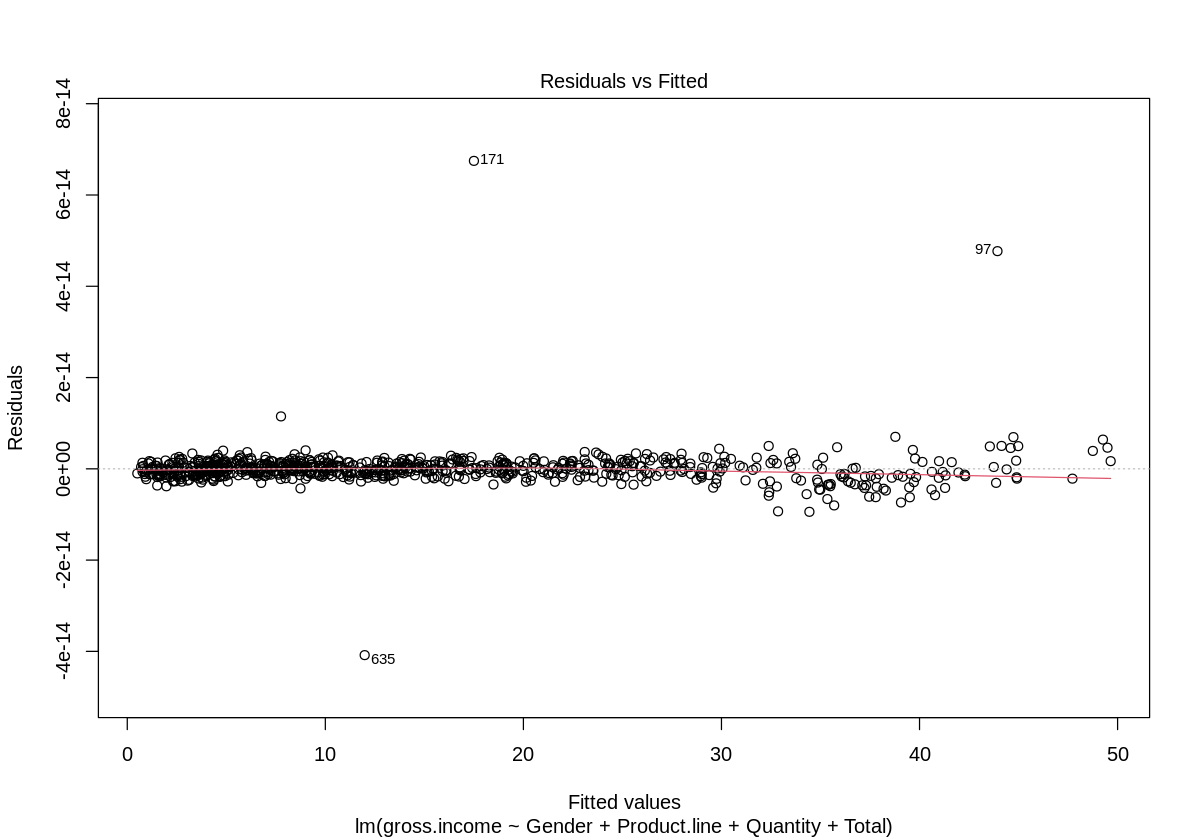

In [ ]:
plot(l_model , which = 1)

 The x-axis represents the fitted values, and the y-axis represents the residuals. Residuals are the difference between an observed data point and the value predicted by the model. In this scatter plot, the residuals are plotted against the fitted values to assess the model's fit. However, there are a few outliers that the model did not fit as well.

Linearity : This defines to the assumption that relationship between the dependent variable and the independent variable is almost linear. This can be observed from the fitted values Vs residuals plot.

From the graph, the we can conclude that the model follows linearity .

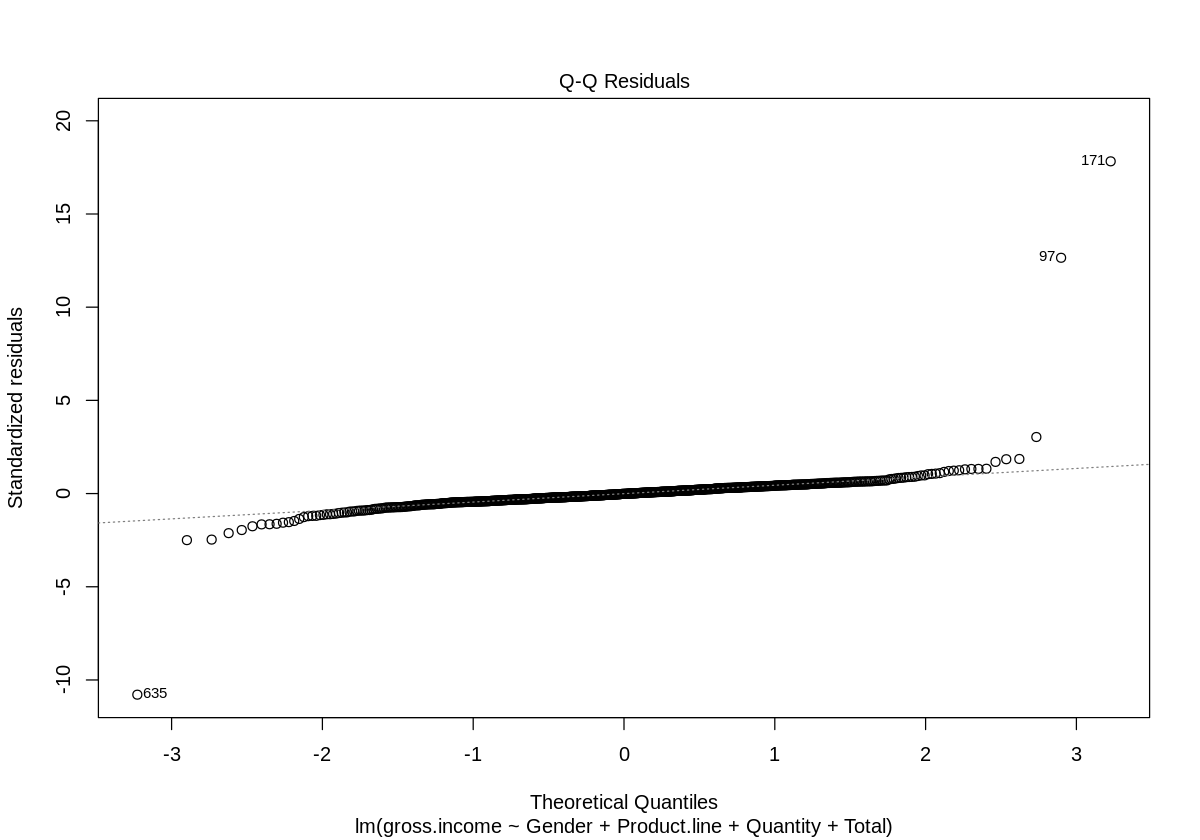

In [ ]:
plot(l_model , which = 2)

Normality :  Q-Q plot, is a diagnostic tool used to assess the normality assumption of a linear regression model. In the case of a normal Q-Q plot, the points would fall along a straight diagonal line. This would indicate that the residuals of the model are normally distributed.

From the graph, the points deviate from a straight diagonal line, particularly at the tails. This suggests that the residuals of the model may not be normally distributed. There seems to be few outliers such as point 635 , 97 and 171 , which mainly contribute to this deviation.


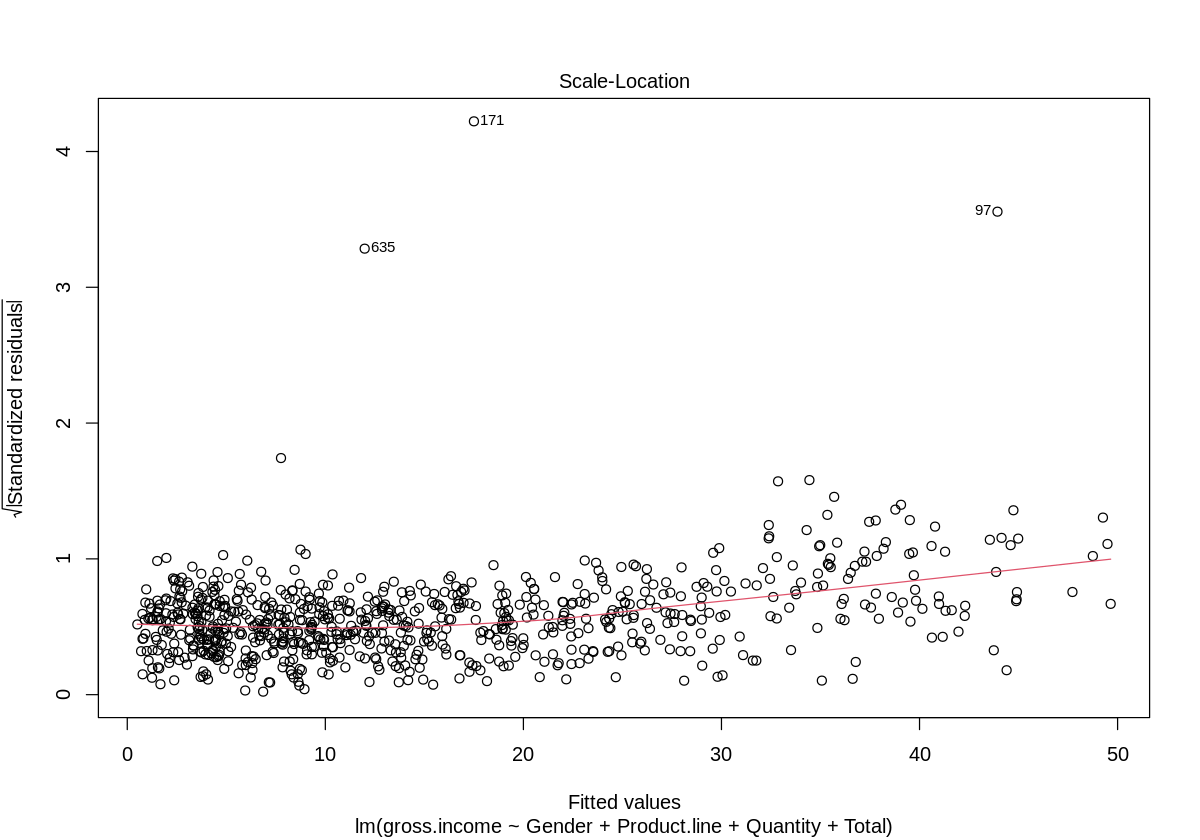

In [ ]:
plot(l_model , which = 3)

Homoscedasticity : This defines the assumption that the variance of the residuals are constant. We can determine the Homoscedasticity using the residuals Vs fitted plot.From the graph,  Since the variance is different and the spread is not constant , the data is heteroscedastic.

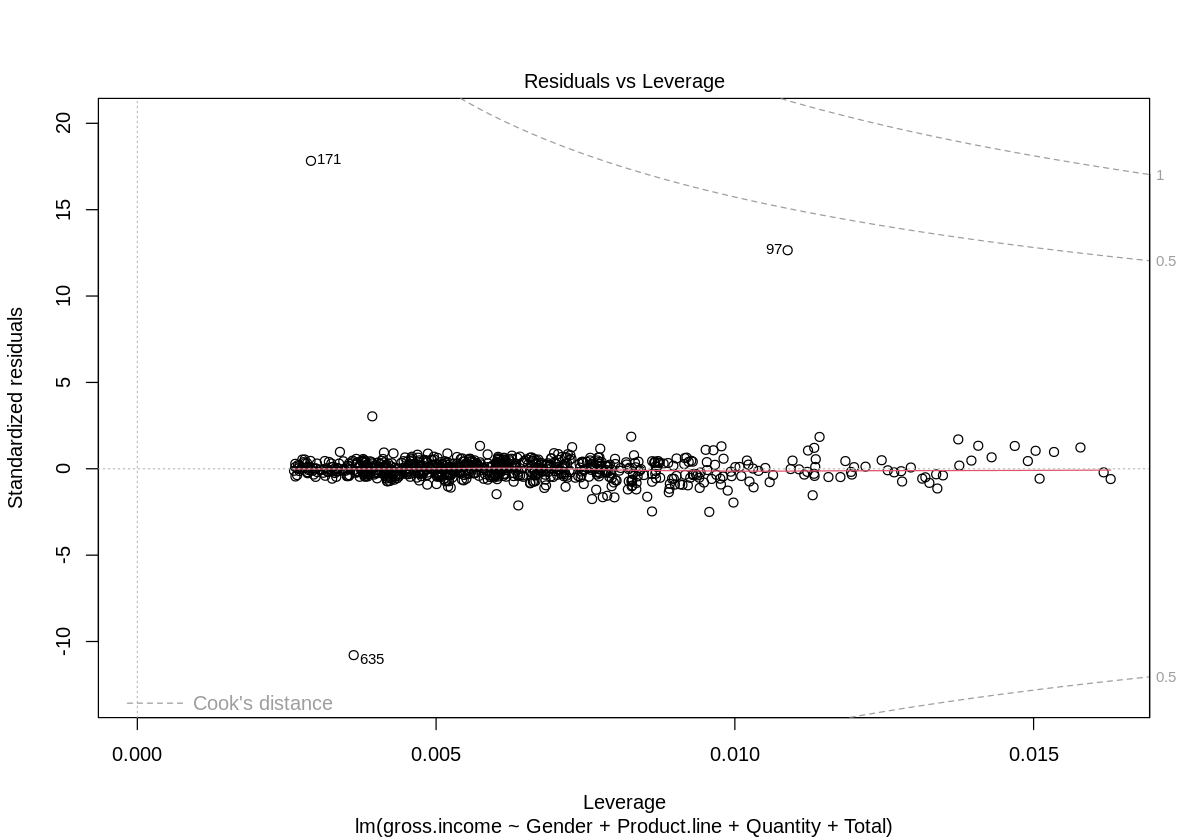

In [ ]:
plot(l_model , which = 5)

Regression analysis uses Cook's distance as a diagnostic tool to find significant outliers in a set of predictor variables.

Every data point has a single value according to Cook's distance. Greater Cook's distance values suggest that a particular data item has a more substantial impact on the model and may need additional investigation.

The potential violations of these assumptions are the outliers from the data which can be viewed from the Residual Vs Leverage Plot . To check if these points are influential , we need to remove these points from the dataset and the perform our analysis again. If the model resulting model is overfitting the data then these points are influential in removing the bias from our model and we need those points to generalize our model and making it more robust.



# Report

## Introduction

Retail analytics plays a crucial role in understanding customer behavior and preferences, which can vary considerably based on demographic elements like gender, geographical location (branch and city), customer type, and payment methods. These factors not only influence purchasing decisions but also impact  sales and overall profitability.We are interested in fundamental aspects of sales performance, customer preferences, and factors affecting gross income in retail. We want to understand gender-based product choices, sales at different branches, different payment methods, and how customer attributes impact income. Understanding these dynamics is crucial for improving marketing, making customers happier, and increasing revenue.


The previous works related to this analysis, which served as references for this research, are discussed .$^1$The paper researches about the application of retail analytics in developing a data analytics system for product management and sales forecasting in the retail sector. By employing machine learning algorithms such as linear regression, random forest, and XGBoost, the study showcases how advanced analytics techniques can improve forecasting accuracy and optimize inventory management, ultimately leading to enhanced decision-making and customer satisfaction in retail operations.$^2$This paper demostrates data-driven insights, brands that can improve performance, optimize sales strategies, and reduce losses, showcasing the pivotal role of retail analytics in enhancing operational efficiency and decision-making in the retail sector.

While these research works explore retail analytics and customer satisfaction using machine learning and other feature selection methods, our focus remains on conducting statistical analysis.  


## Research Questions

1. Does gender influence the choice of product category purchased? Are there significant differences in the distribution of product line sales between genders?

2. How do sales performance and customer preferences vary across different branches? Is there a branch that consistently outperforms others in terms of Ratings or gross income?

3. Is there a significant difference in the average total sales among various payment methods? This will help us in improving the Payment method preffered by most Customers.

4. How is the Gross income affected by the Rating , gender , type of customer , City , product line Payment Method etc.? This will let us know the features that gross income depend on.


Thus retail analytics is crucial for understanding customer behavior and preferences, impacting sales and profitability. This research aims to explore gender-based product choices, branch-specific sales, payment methods' impact, and factors influencing gross income , thus making an positive impact on customer satisfaction and profitability.

## Methods/Results(Experimental design and data collection) :

The dataset is taken from github which comprises sales data from three branches during January, February, and March of 2019, encompassing various product categories, gender, customer types, gross income, and customer ratings. This dataset is valuable for analyzing sales and profitability per branch, evaluating customer satisfaction, and examining gender-based differences across product categories. By leveraging this data, we can gain insights into branch performance, identify areas for improvement, and tailor marketing strategies to enhance customer experience and optimize revenue generation and improve the branches based on the customer rating and gross income.

For the analysis, different statistical tests were used to answer the research questions. These included the T-test for comparing group means, ANOVA to determine if the means of two groups are equal, linear regression modeling to identify dependent features, Durbin-Watson test to understand the nature of residuals, LM model diagnostics, and Bootstrapping with hypothesis testing to determine the best-performing branch voted by customers. Furthermore, exploratory data analysis (EDA) was performed on the data to understand its distribution and gain a basic understanding of the dataset. These statistical techniques provided valuable insights for informed decision-making for our retail analytics.

## EDA

<p float = 'left'>
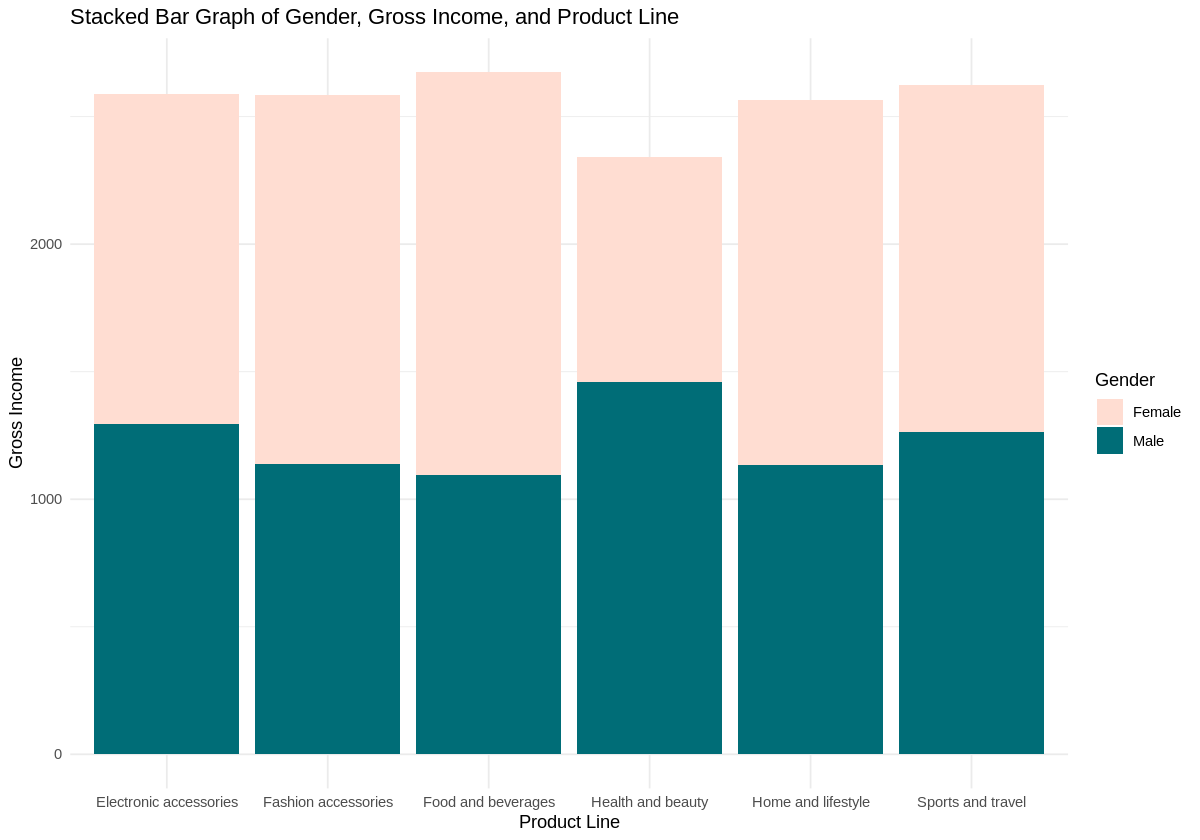


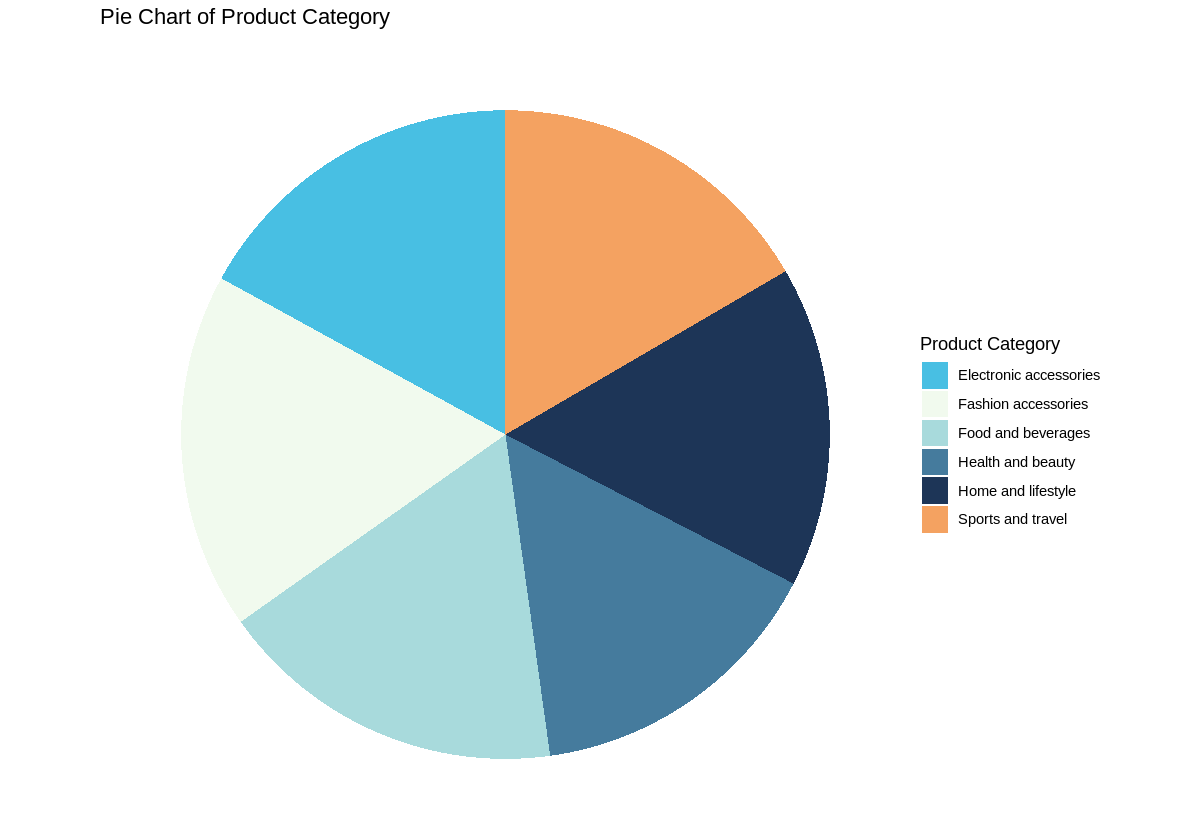

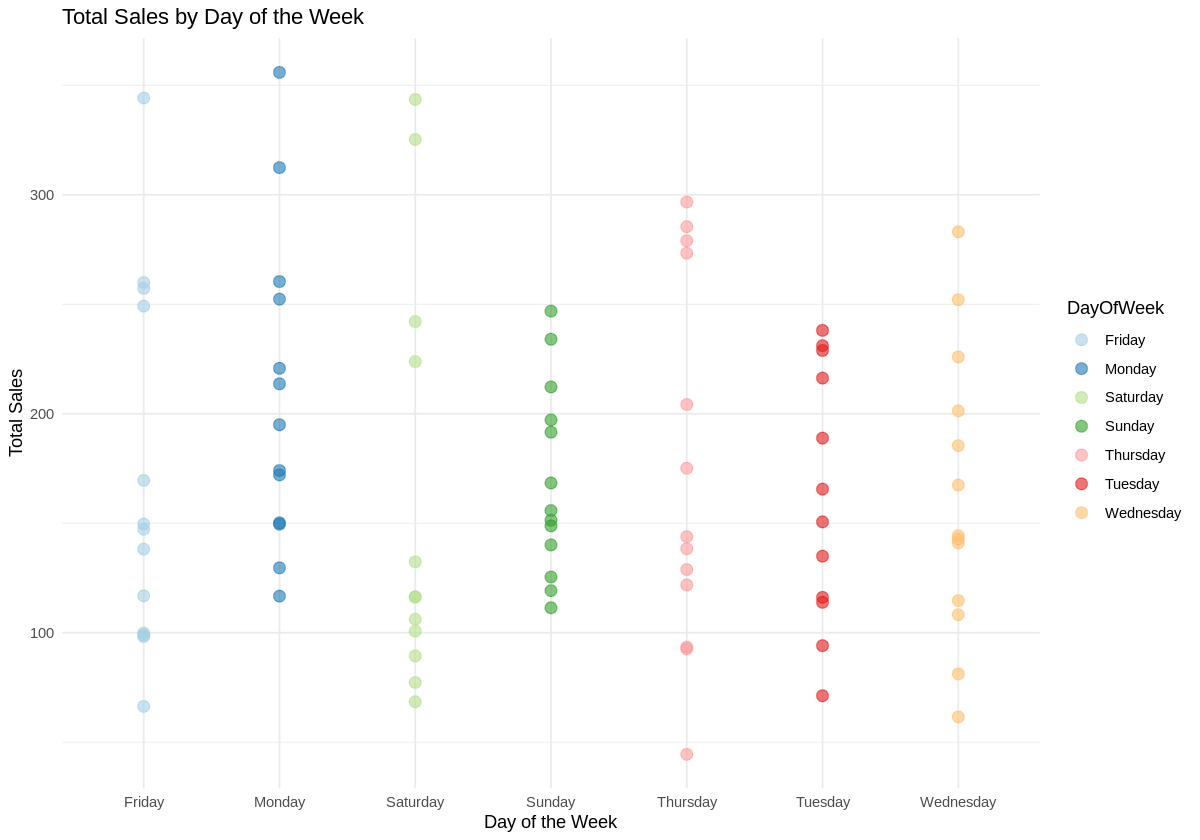


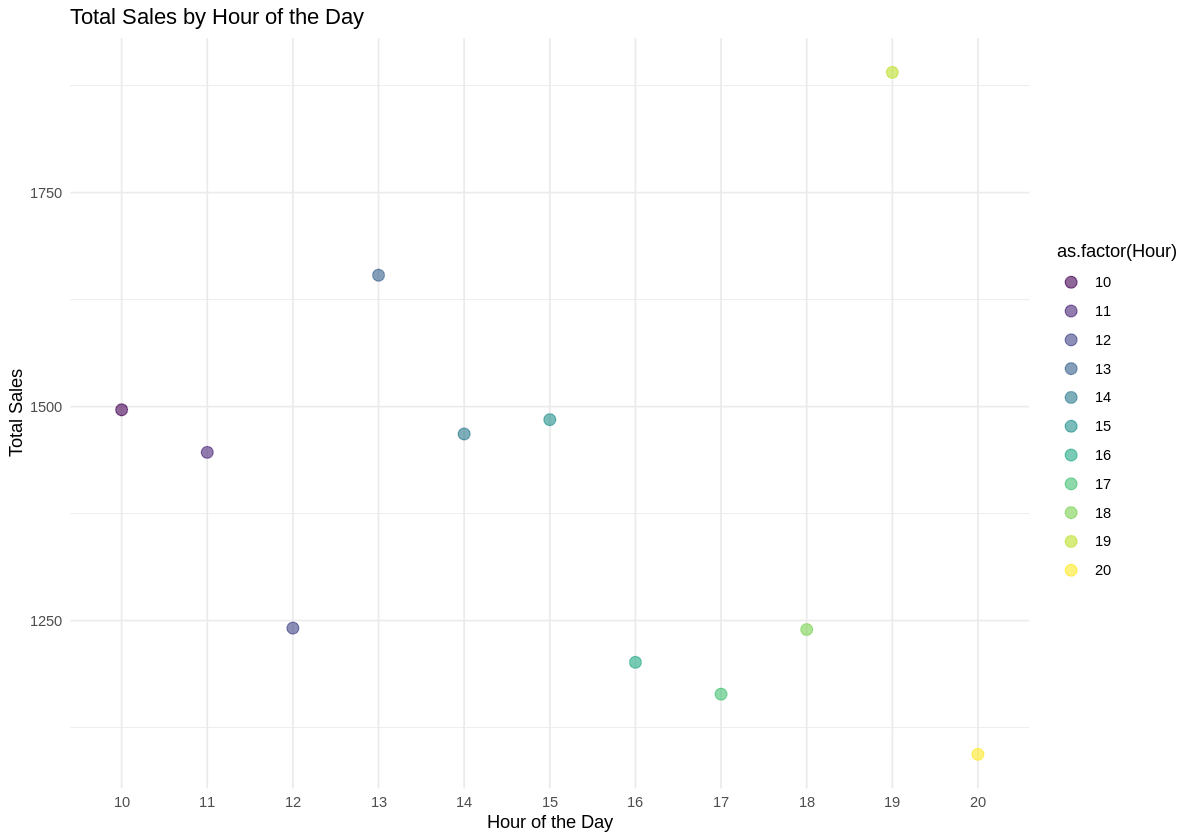


<img src = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nO3deWCU9Z348WcyOSAkhCAoYKgCcmvBqwKrtVrtWnHBo7q1tV7tIhWvetWz%0AeJV1qy5Ui+2Cxa3uuta2FqlH7daux7q6RUU5qojgUkQQw5EQQsgkM78/ppsfCzkmTA7y5fX6%0Ai3zn4Xk+M3lI3swZS6VSEQAAXV9OZw8AAEDbEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2%0AAACBEHZd3i233BKLxX70ox919iBRFEVvv/325z73ufz8/KKiotWrV2e/wxtuuCEWi/3kJz/Z%0A4w0AYN8RSNht2LDh9ttvHz9+fN++fQsKCsrKyiZMmHDvvfd++umnnTjVo48+umDBgk4coON9%0A4xvfWLhw4bHHHjtlypTCwsJmtszwW1ZaWnrQQQcVFxc3rOxyq+6+AQDss2IBfPLEI4888u1v%0Af7u6ujovL2/MmDGlpaVr16794IMPamtrS0tLH3/88S996UudMlj//v0nTpz40EMPtetRbrnl%0Alu9///sPPPDAZZdd1q4HatGOHTu6devWs2fPjRs35ubmNrNlNt+yjrlVAaAr6vL32D3++OMX%0AXHBBTU3NzTffXF5evnDhwt/97nfLli1bs2bNFVdcsXnz5lNPPXXRokUdP9iqVavWr1/f8cft%0ARNu3b4+iqLS0tPmqy+Zbtg/eqgDQCqmurLKyslevXlEU/fjHP250g+9+97tRFE2ZMqVhpba2%0AdtasWUcddVRRUVFBQcGQIUOmTZu2du3ahg2mTZsWRdHDDz+8835ee+21KIomTpyY/vKWW26J%0Aouipp55aunTp6aefnn4wccyYMY899lh6g7POOmvnG/mv/uqvmroKv/jFL0444YTS0tK8vLz+%0A/fufcsopzz777M4bVFRU3HDDDSNGjOjWrVt+fv4hhxxy7bXXVlRUNGxw8803R1H0wAMPNKwk%0Ak8m5c+eOGzeuqKioW7duI0aMuOWWW6qqqlp13N01f9NNnjx5l1NrxYoVu++ktd+y9JfpjRu9%0AVXfeoF2vPgDs/bp22D344INRFB111FFNbbB9+/bVq1c3fFlfX//lL385iqIRI0ZceeWVt956%0Aa/rL/v37/8///E96m0zC7o477oii6LbbbispKfnSl770ne98Z+LEienaeOGFF1Kp1NNPP33h%0AhRdGUTRu3LiZM2c+8cQTjY43Z86cKIr69u17ySWX3HrrrRdffHHv3r1jsdgjjzyS3qC2tva4%0A446LoujII4+89tprr7zyyuHDh0dRdPTRR9fV1aW32T3szjvvvPSVuuaaa2666aZx48ZFUTR2%0A7NjKysoMj7u7Fm+6BQsWzJgxI4qi0tLSmTNnzpw5c8uWLdl/y3butkZv1d3Drj2uPgB0CV07%0A7NJ34dx3330Zbp/+jT5+/PiampqGxfTdb+ecc076y0zC7u///u+jKMrPz3/00Ucbtrn22muj%0AKLrgggvSX/7iF7+Iouib3/xmM/McdthhURR98MEHDStr1qwpLi4eN25c+stf/epX6Y5pyLgd%0AO3aMGDEiiqIFCxakV3YJu5///OfpEGzomGQymX763Q033JDhcffsptu8eXMURQcddFAzV7m1%0A37Jdum33W3WXDdrp6gNAl9C1n2O3atWqKIrSv6cz8bOf/SyKoltvvbWgoKBh8brrrsvPz58/%0Af376KWKZO/roo9N3DqWdffbZURS9//77me9hy5YtsVisR48eDStlZWXl5eXpjoyi6Igjjnjy%0AyScfeOCBeDyeXsnPz08/6Ll48eJG9zl37twoiv7+7/++4YWisVjszjvvzMvLS1/9TI67u7a6%0A6Vr7LWutdrr6ANAldO2w27p1axRFGb7VRSqVevPNN6MomjBhws7rPXv2HD58eG1t7bJly1p1%0A9PRjfA1KS0uj/30BQYb+5m/+JpVKnXDCCfPmzWt4TUB+fn7DBgcffPAZZ5xx1FFHRVG0devW%0A9evXr1+/Pv02Ik0d6PXXX492u469evU69NBD161b9+c//zmT4+6iDW+6Vn3L9kB7XH0A6Cqa%0Ae/Xi3q9nz55RFKUfAWxRVVVVTU1Nfn5+SUnJLhf17ds3iqLy8vJWHb1fv347fxmLxaIoSrXm%0A7WNmzZpVX18/b968b37zm1EUjRo16rTTTps6deqgQYMatpk/f/6999775ptv1tTUtLjD7du3%0AV1VVRVFUVFTU6AZr1679zGc+k8lxd9aGN12rvmWt1U5XHwC6iq4ddsOHD3/rrbfeeOON9BP5%0Am9dMeCWTyYYNOlJeXt5PfvKT6dOnL1iw4LnnnvvDH/7wgx/8YNasWY8++ug555wTRdGcOXMu%0AueSS4uLiqVOnfu5znyspKcnJyZk/f/4//dM/NbrD9FWIxWLf+973Gt0gHaMtHrfR3bbJTdeq%0Ab1lrtdPVB4CuomuH3UknnfRv//ZvP/vZz2688cZG3zstlUrdddddZ5999ogRI4qKigoLC6ur%0Aq7ds2ZJ+x40G6U87SN/51GjErFu3rv2uRf/+/S+55JJLLrmkpqbmn//5ny+//PJLLrlk8uTJ%0ABQUF6ZffPv3005///Ocbtm/mqWDdunUrKSmpqKiYNm1a+urs2XF32TLDmy4TrfqWZbjPBu10%0A9QGgq+jaz7E799xz999//5UrV6ZfGbq7GTNmfO9730s/4hZFUfrJaq+++urO22zatGn58uXd%0Au3cfPXp0FEXdunWLdnuscOHChe0x/+rVq3dOxm7duk2dOnXChAlbtmxZtWrVjh071q5dW1RU%0AtHPVpVKp3/72t83s85hjjomi6OWXX95lfdOmTRket9HdZnLTZaK137LWaqerDwBdQtcOu+7d%0Au//0pz+NxWI/+MEPLr744p0/k2D9+vXTpk275ZZbevbs2fDxU+lcmDFjRm1tbcOWM2bMqKur%0A+/rXv56+q2bw4MHR/76ZSHqDd999N/1ay1ZJB+LGjRub2uCdd945+OCDzzvvvJ2H2bp166pV%0Aq+Lx+P77719QUNC7d++qqqo1a9akL02lUnfccUf6FQBbtmxpdLfp63jbbbft/KGrr7zyygEH%0AHJB+3W6Lx21mt83fdJlo7bdsFy3equ109QGga+iM91hpY7/85S/TT8nPyckZM2bMySeffOih%0Ah6Zf5Dhw4MDFixc3bJlMJtPvFXLooYded911N9100xe/+MUoioYNG1ZeXp7e5pNPPknvbfz4%0A8d/5zne++tWvFhUV3XPPPVEUffnLX05vk34fu3vuuWfnMVasWBFF0ZgxY9JffvDBB7FYLC8v%0A7+KLL546dWqjk3/ta1+Lomjw4MHTpk373ve+d+mllx500EFRFF155ZXpDa6++uooioYOHXrX%0AXXfddddd48aNGz58+PPPPx9F0X777Xf33XevWbNm9zcoPvfcc6MoOvDAA6+++urp06efddZZ%0AeXl5xcXF//3f/53hcXeXyU2XyfvYtfZbtsvb1O1+q+7+BsXtcfUBoEsIIexSqVR5efkdd9wx%0Abty4Pn365ObmlpaWfv7zn3/ooYe2b9++y5aJRGLWrFlHHHFEYWFhQUHBiBEjbrzxxs2bN++8%0AzZIlS0488cTCwsKioqJjjjlm/vz56bt/vvCFL6Q3yCTsUqnU3Xff3adPn4KCgiOOOKLRsevr%0A62fPnj1hwoQ+ffrE4/GSkpLjjjtu3rx5yWQyvcH27dtvvvnmIUOGFBQUDBw48NJLL01X1IUX%0AXtijR49+/fotXrx497Crr6+fO3fu+PHji4uLc3Nzy8rKzj///HfffTfz4zaqxZsu87BLZfwt%0A273bdrlVd9+gna4+AOz9YqnWvD0HAAB7ra79HDsAABoIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOzpCTU1NRUVFXV1dZw8C%0AbSCRSFRUVOzYsaOzB4E2kEwmKyoqtm/f3tmD0DaEHR0hmUwmEolUKtXZg0AbSJ/PyWSysweB%0ANpBKpRKJhP94B0PYAQAEQtgBAARC2AEABELYAQAEQtgBAARC2AEABELYAQAEQtgBAARC2AEA%0ABELYAQAEQtgBAAQit7MH2HPJZNJnj3YV6e9UMpmsr6/v7FkgW+lPiXU+E4b0aZxKpZzPXUUs%0AFsvJafKOuVjXbaNt27b50OKuIv0rMDc3NxaLdfYskK30+RyPx5v52QpdRSqVqqury8nJicfj%0AnT0LGcnJySkuLm7q0i4cdnQh1dXV1dXVJSUleXl5nT0LZGvHjh1bt27t0aNH9+7dO3sWyFZ9%0Aff3mzZsLCgqaaQW6EP/dBAAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiE%0AsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAhEbmcPAAB76M9/%0A/vODDz7Y2VN0balUqqamJh6P5+fnd/YsXduwYcMuvvjizp5C2AHQZX300Uf/8A//0NlTQBRF%0A0cknnyzsACBbB5WNGT7krzp7CvZd9fWJF/5zbmdP8RfCDoCurUf3Xv36HtLZU7DvSiRqOnuE%0A/8+LJwAAAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAAAiHs%0AAAACIewAAAKR29kDdAHPPPPMokWLOnuKri2RSCQSiYKCgng83tmzdG1nnnnmqFGjOnsKAPZS%0Awq5lv/71r3/605929hQQRVF0yCGHCDsAmiLsMnXM4Wf1KCzt7CnYd635eOmKD1/v7CkA2KsJ%0Au0wd0Hdwr579O3sK9l1bq8o7ewQA9nZePAEAEAhhBwAQCGEHABAIYQcAEAgvnoB9y6JFi/79%0A3/+9s6fo2urq6nbs2JGfn5+Xl9fZs3RtxxxzzPHHH9/ZU0BQhB3sW/7rv/7ru9/9bmdPAVEU%0ARddff72wg7Yl7GBfNPKQ4w7oO6Szp2DftaXyk7eXPdfZU0CAhB3si/YrHfiZAz/b2VOw7yrI%0AX9nZI0CYvHgCACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIO%0AACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDC%0ADgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQ%0Awg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAg%0AEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQue269zVr1vzsZz979913U6nU%0AoEGDvvGNb4wYMSKKoqqqqjlz5ixevDiRSAwfPnzq1Kn7779/M+sAALSoHe+xq6uru/XWW3v0%0A6PGDH/zgvvvu69u37+233759+/YoimbNmrVhw4bp06ffc889hYWFd9xxRzKZbGYdAIAWtWPY%0Abdu2bfLkyVOnTj3wwAP79+9/9tlnb9u2bd26deXl5QsXLpwyZcqgQYMGDBgwderUtWvXLlmy%0ApKn19psQACAk7fhQbElJyRlnnJH+89atWxcsWFBWVjZw4MA33ngjLy9v0KBB6YuKiorKysqW%0AL19eXV3d6PqYMWMa3X9dXV0qlWq/+Ru415C9R319fSKRyHIPbTUMZCmZTGZ5PtfV1bXVMJCl%0AVCqV5fmcuby8vKYuat/n2EVRlEwmzz777EQiceihh9555515eXmVlZXFxcWxWKxhm5KSkoqK%0AipKSkkbXm9rztm3bOuYWrK2t7YCjQCaqq6ub+UeRifTTIWBvsGPHjizP523btrXVMJClurq6%0ALM/nDMXj8dLS0qYubfewy8nJ+eEPf7h58+Znnnnmpptuuu+++6Io2rnedtbUeqO6deuWn5/f%0ANlM2q5kuhg5WUFDQo0ePLPfQVsNAlvLy8rI8n7t169ZWw0CW4vF4ludzhpqPpXYPuyiKysrK%0AysrKRo8e/bWvfe2ll17q06dPZWVlKpVqmKyioqK0tLRXr16Nrje12w77/RSPxzvmQNCi/Pz8%0A7t27Z7MH/1Fh75Gbm5vl+ew/Kuw9cnJysjyf22aM9tv1okWLpkyZsmPHjvSXsVgsNzc3iqKh%0AQ4cmEomVK1em1ysrK9esWTNy5Mim1ttvQgCAkLRj2A0dOrSmpmbWrFlr1qxZv379Qw89VFNT%0Ac+SRR/bu3Xv8+PGzZ8/+8MMP165dO3PmzCFDhowaNaqp9fabEAAgJO34UGxRUdGdd9758MMP%0AX3PNNbFY7DOf+cytt97ar1+/KIquuOKKOXPm3HbbbfX19aNHj77lllvSD782tQ4AQIva9zl2%0ABx100G233bb7emFh4VVXXZX5OgAALfJZsQAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQ%0AdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACB%0AEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAA%0AgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYA%0AAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2%0AAACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQ%0AdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACB%0AEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAA%0AgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYA%0AAIHI7ewB9lxNTU19fX0HHKiurq4DjgKZ2LFjx7Zt27LZQ21tbVsNA1lKJBJZns/bt29vq2Eg%0AS/X19VmezxnKycnp3r17U5d24bCLx+OxWKwDDtQxR4FM5OTk5OZm9c82J8f99Owtsj+fs/zr%0A0IZisVjHnJDNZ0kX/ieRl5fXMQeKx+MdcyBoUV5eXkFBQTZ78IuQvUc8Hs/yfO6wXwTQopyc%0AnCzP57YZo7MHAACgbQg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAI%0AOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBA%0ACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAI%0AOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBA%0ACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEDktuveN23aNG/evHfe%0Aeae2tnbw4MEXXXTRsGHDoiiqqqqaM2fO4sWLE4nE8OHDp06duv/++zezDgBAi9r3Hru77rqr%0AvLz89ttvnzVrVp8+fe64446ampooimbNmrVhw4bp06ffc889hYWFd9xxRzKZbGYdAIAWtWPY%0Abd26tW/fvtOmTRs8eHD//v3PP//8ysrKNWvWlJeXL1y4cMqUKYMGDRowYMDUqVPXrl27ZMmS%0Aptbbb0IAgJC040OxxcXFN954Y8OXGzduzMnJ6dOnz3vvvZeXlzdo0KD0elFRUVlZ2fLly6ur%0AqxtdHzNmTPsNCQAQjPZ9jl2DrVu3PvDAA6effnppaWllZWVxcXEsFmu4tKSkpKKioqSkpNH1%0Apva5bdu2urq69p07iqIoqq2t7YCjQCaqq6ub+UeRie3bt7fVMJClHTt2ZHk+V1VVtdUwkKW6%0Aurosz+cM5eTkFBcXN3VpR4TdRx99dOedd44dO/aCCy5Ir+xcbztrar1RdXV1iUSiDeZrief5%0Asfeor6/P8rSvr69vq2EgS8lk0vlMMFKpVMdkSTweb+bSdg+7d9555wc/+MG555572mmnpVd6%0A9epVWVmZSqUaMq6ioqK0tLSp9ab23LNnz/YePq1bt24dcyBoUVFR0X777ZfNHnr06NFWw0CW%0AunfvnuX53GG/CKBFeXl5WZ7PbaJ9w+5Pf/rTP/zDP1xzzTVHHnlkw+LQoUMTicTKlSsPOeSQ%0AKIrSr6gYOXJk//79G11vauetunsPwhCLxbI88/3DYa/ifCYke8MJ2Y6viq2trZ01a9akSZMO%0AOuig8v9VU1PTu3fv8ePHz549+8MPP1y7du3MmTOHDBkyatSoptbbb0IAgJC04z1277777vr1%0A6x977LHHHnusYfGSSy6ZOHHiFVdcMWfOnNtuu62+vn706NG33HJLOnKbWgcAoEXtGHZjxoxZ%0AsGBBoxcVFhZeddVVma8DANAinxULABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAI%0AYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcA%0AEAhhBwAQiIzC7qijjnr33Xd3X//Vr341atSoth4JAIA9kVHYvfnmm9u2bdtlsa6ubtmyZStX%0ArmyHqQAAaLXc5i+OxWLpPxx99NGNbnDEEUe08UQAAOyRFsLu7bfffumll6688srJkyf36dNn%0A54tisdiAAQP+7u/+rj3HAwAgUy2E3ZgxY8aMGfPss8/ec889Q4cO7ZiZAADYAy2EXdpvf/vb%0A9p4DAIAsZfTiiQ0bNlx44YUHHnhgPB6P7aa9RwQAIBMZ3WN32WWX/frXvz7++ONPPvnk3NyM%0A/goAAB0so0r7wx/+8Mtf/nLy5MntPQ0AAHsso4dit2/fPmHChPYeBQCAbGQUdkceeeSyZcva%0AexQAALKRUdjNnDnzu9/97muvvdbe0wAAsMcyeo7dlVdeuW7dugkTJhQWFvbt23eXS//nf/6n%0A7ecCAKCVMgq7nJycYcOGDRs2rL2nAQBgj2UUdi+//HJ7zwEAQJYyeo4dAAB7v4zusevTp09T%0AF9XW1lZWVrbdPAAA7KGMwu7YY4/dZWXdunVLliwZMmTI8ccf3w5TAQDQahmF3fz583dfXL9+%0A/d/+7d9++ctfbuuRAADYE3v+HLt+/frdd99906dPb8NpAADYY1m9eKKsrOxPf/pTW40CAEA2%0A9jzsUqnUvHnz9ttvvzacBgCAPZbRc+zGjh27y0p9ff369evLy8uvvfbadpgKAIBWyyjsdpeX%0Al/fZz3528uTJU6dObduBAADYMxmF3dtvv93ecwAAkKVW3GO3cePG119//eOPP87JySkrK5sw%0AYUJxcXH7TQYAQKtkFHbJZPL666+///77E4lEw2KPHj2mT59+3XXXtdtsAAC0QkZhd9999913%0A331nnHHGaaed1r9//2QyuXbt2ieffPL6668/4IADzj///PaeEgCAFmUUdg8//PDVV1993333%0A7bw4ZcqUSy655Ic//KGwAwDYG2T0PnarVq2aOHHi7uuTJ09+991323okAAD2REZhl5ubW11d%0Avft6IpGIx+NtPRIAAHsio7A7/PDD//Ef/7G2tnbnxZqamgcffPCoo45qn8EAAGidjJ5jd+ON%0AN5522mlDhw499dRTDzzwwFQqtWbNmmeeeWb9+vXPP/98e48IAEAmMgq7U0899cknn7zxxht/%0A8pOfNCwedthhc+fOPemkk9ptNgAAWiHTNyg+/fTTTz/99I8//njt2rWxWGzgwIEHHHBAu04G%0AAECrtBx269evj8fjffv2jaJowIABAwYMiKLo9ddfz8vL6927d7sPCABAZlp48cTTTz89YsSI%0Af/3Xf91l/cILLxwxYoTPkAUA2Hs0F3YrVqz46le/WlRU9NnPfnaXi+bNmxePx0899dTNmze3%0A53gAAGSqubD70Y9+VFtb+/vf//7EE0/c5aIJEyY899xzGzZs+NGPftSe4wEAkKnmwu75558/%0A66yzRowY0eilY8eOPe200x577LH2GQwAgNZpLuw++uijww47rJkNjjjiiA8//LCtRwIAYE+0%0A8OKJnJzmNkgmk/n5+W06DwAAe6i5bhs0aNDChQub2eCll14aNGhQW48EAMCeaC7sTj311Kee%0AeurNN99s9NKnn376xRdfnDRpUvsMBgBA6zQXdldffXVJSckpp5zy+OOP19fXN6xv37591qxZ%0A55xzTt++fb/zne+0/5AAALSsuU+eOOCAA5566qkzzjjj3HPPveyyy8aMGVNcXLxp06ZFixZV%0AVVX169dvwYIFPnwCAGAv0cJHih177LFLly794Q9/+NRTT7300kv19fW5ubmjRo0688wzL7/8%0AclUHALD3aPmzYg844IAZM2bMmDEjlUpVV1cXFhbGYrEOmAwAgFZpOewaxGKxHj16tN8oAABk%0Ao4X3sQMAoKsQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AA5a6I4AABpj%0ASURBVACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACByO3sAfZcZWVlIpHogAPt2LGj%0AA44Cmaiqqtq4cWM2e9i2bVtbDQNZ2r59e5bnc0VFRVsNA1lKJBJZns8ZisfjvXr1aurSLhx2%0APXv27JgDFRQUdMyBoEVFRUX77bdfNnvo0aNHWw0DWerevXuW53NJSUlbDQNZysvLy/J8bhMe%0AigUACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAI%0AhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMA%0ACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLAD%0AAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISw%0AAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiE%0AsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAI%0AhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMA%0ACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLAD%0AAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMACERuex9g7dq1M2fO/OCDD+bP%0An9+wWFVVNWfOnMWLFycSieHDh0+dOnX//fdvZh0AgBa17z12r7zyyk033VRWVrbL+qxZszZs%0A2DB9+vR77rmnsLDwjjvuSCaTzawDANCi9g27RCJx7733jhs3bufF8vLyhQsXTpkyZdCgQQMG%0ADJg6deratWuXLFnS1Hq7TggAEIz2fSj2xBNPjKJo5cqVOy+uWLEiLy9v0KBB6S+LiorKysqW%0AL19eXV3d6PqYMWMa3XkymUylUu05/l90zFEgE8lksr6+Pss9tNUwkKVUKuV8JhjZn88ZisVi%0AOTlN3jHX7s+x211lZWVxcXEsFmtYKSkpqaioKCkpaXS9qf1s3bo1kUi076xRFEXRjh07OuAo%0AkIlt27Zt3rw5mz1UV1e31TCQpZqamizP561bt7bVMJClurq6LM/nDMXj8dLS0qYu7YSwi6Jo%0A53rLZL1R+fn58Xi8jSZqTsccBTKRl5fXrVu3LPfQVsNAluLxeJbnc35+flsNA1nKycnJ8nzO%0A/EDNXNoJYderV6/KyspUKtWQcRUVFaWlpU2tN7Wf7t27d8S4fhGyN+nWrVtRUVE2eygoKGir%0AYSBL+fn5WZ7PHfaLAFoUj8ezPJ/bRCe8j93QoUMTiUTDE+8qKyvXrFkzcuTIptY7fkIAgK6o%0AfcNu8+bN5eXl6edAlJeXl5eX19TU9O7de/z48bNnz/7www/T73I3ZMiQUaNGNbXerhMCAASj%0AfR+Kve666zZs2JD+88UXXxxF0be+9a1JkyZdccUVc+bMue222+rr60ePHn3LLbekH35tah0A%0AgBa1b9g99NBDja4XFhZeddVVma8DANAinxULABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcA%0AEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEH%0AABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhh%0ABwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAI%0AYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcA%0AEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEH%0AABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhh%0ABwAQiNzOHmDP1dbWJpPJDjhQfX19BxwFMpFIJGpqarLcQ1sNA1mqq6vL8nyura1tq2EgS8lk%0AMsvzOUOxWKygoKCpS7tw2KVSqVQq1dlTQIdy2hOYLM9n/xzYq+wNJ2QXDrtmcrVtxePxjjkQ%0AtCg/P7979+7Z7CEvL6+thoEs5ebmZnk+d9gvAmhRTk5Oludz24zR2QMAANA2hB0AQCCEHQBA%0AIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0A%0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQd%0AAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCE%0AHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAg%0AhB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBA%0AIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0A%0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQd%0AAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCE%0AHQBAIIQdAEAghB0AQCCEHQBAIHI7e4D/o6qqas6cOYsXL04kEsOHD586der+++/f2UMBAHQN%0Ae9c9drNmzdqwYcP06dPvueeewsLCO+64I5lMdvZQAABdw14UduXl5QsXLpwyZcqgQYMGDBgw%0AderUtWvXLlmypLPnAgDoGvaisFuxYkVeXt6gQYPSXxYVFZWVlS1fvrxzpwIA6Cr2oufYVVZW%0AFhcXx2KxhpWSkpKKioqmtt++fXt9fX0HDJZIJKIoWvLeCwX5hR1wOGjUpi0fR1FUU1NTVVWV%0AzX527NgRRdHKP79RvvnPbTMZtF719sooimpra7M8n7dv3x5F0fpPP/jj20+2zWTQeslkfRRF%0A9fX1WZ7PGcrJySksbDJI9qKwi6Jo56prUW1tbTq52ls6Hz/881sdcCxoXiKRqKmpyXIPURSt%0A++T9dZ+830ZDwR6qr6/P8nyura2NomjTlrWbtqxto6FgDyWTySzP5wzF4/GuEXa9evWqrKxM%0ApVINeVdRUVFaWtrU9kVFRalUqgMGu+222y677LIOOFDAduzYUVtbW1hYGI/HO3uWrm3w4MG9%0AevXKZg/f+MY3jj/++LaaZ9+UzuuCgoL8/PzOnqVr69evX5bn8/jx41977bW2mmfflEwmt23b%0AlpeX161bt86epWsrKSnJ8nzOUPP3gu1FYTd06NBEIrFy5cpDDjkkiqLKyso1a9aMHDmyqe07%0ALBEOOeSQ9Ejsserq6urq6pKSkry8vM6eZV83YMCAAQMGdPYUXduOHTu2bt3ao0eP7t27d/Ys%0A+7pevXqNGzeus6fo2urr6zdv3lxQUFBcXNzZs9AG9qIXT/Tu3Xv8+PGzZ8/+8MMP165dO3Pm%0AzCFDhowaNaqz5wIA6BpiHfNoZoaqq6vnzJmzaNGi+vr60aNHT506tZmHYulC3GNHSNxjR0jc%0AYxeYvSvsCJWwIyTCjpAIu8DsRQ/FAgCQDWEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcA%0AEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQiNzO%0AHoB9Qn5+fk5OTjwe7+xBoA3k5uYWFRXl5vr5SQhycnKKior8fA5GLJVKdfYMAAC0AQ/FAgAE%0AQtgBAARC2AEABELYAQAEQtgBAARC2AEABELY0aE2bNgwadKk1atXN7VBfX39pEmT3nrrrY6c%0ACtpK+gR+5513OnsQYB8l7Pg/rr766kmTJq1atWrnxWQyef7550+aNKm+vr6zBoNWufrqq7/y%0Ala98/PHHOy9edtllzz33XLseNycn5/vf//6QIUOiKFq8ePEHH3zQrodjH/fKK6+ceeaZu/xX%0A+Q9/+MNZZ521Zs2azpqKziXs2FVJSckLL7yw88pbb70l6ehyCgoKZs+e3cEHjcVihx12WFFR%0AURRF8+fPX7FiRQcPwD7luOOOO/roox944IGGzxqoqKj46U9/+rWvfW3gwIGdOxudxUfisKsj%0AjzzypZdeuuiiixo+MemFF1747Gc/++qrr6a/XL169U9/+tMPPvggmUwOHz586tSp/fv3T6VS%0AkydPvvbaa1944YXy8vKampqvf/3rJ554YhRFq1atevDBB1evXt2vX7+zzz674UCN7mfnSRrd%0A4Prrrx80aNC3v/3t9DbLly+//vrr586du//++3fErUPXMXny5Keeeur3v//9SSedtPulmZ9d%0As2fPvvTSS6dNm/biiy9++umnqVRqypQpxxxzTKMb/+QnP7nkkkvuvPPOJ554YunSpe+8887v%0Afve7mTNnNnq4b37zmw3/TB599NFf/OIXDz30UPpMvvHGGw8//PBzzjmno24tuqpvf/vb06ZN%0AW7BgweTJk6Momjt3bv/+/c8444yo9T+rP/zww5kzZ3788ccDBw68+OKLb7755vvvv//ggw/e%0AsmXL3Llzly5dum3btsGDB1900UUjR45sZj90LvfYsauhQ4cWFhYuXLgw/WVVVdUbb7xx7LHH%0ANmxw99139+7de968efPmzevevfvMmTOjKIrFYjk5OfPnz7/66qtnz5791a9+9cc//nFNTU0q%0AlZoxY0ZZWdmjjz76ve997/nnn29+PztrdIMvfelLL7/8cm1tbXqbV1555dBDD1V17K5Hjx4X%0AXXTRvHnzKioqdr8087Mr/f+N55577rvf/e5DDz107rnn3n333RUVFc2fit///vf79u37rW99%0AK73nRg83duzYZcuWpbdfvHjxwIED01/W1ta+//77RxxxRLvePoShV69ef/d3f/cv//Ivn3zy%0AyVtvvfXaa69deeWVOTk5Uet/Vt95550HH3zwI488cuWVVz788MPpjaMouuuuu7Zt23b//ff/%0A67/+64gRI26//fbKysqm9tO5twaRsKNRJ5988u9///v0n1955ZXRo0f36dOn4dJ77rnn29/+%0Adrdu3QoLC48//vgVK1Y0PApwwgknlJSURFE0ZsyYHTt2bNiwYfny5Rs2bPjqV7/arVu3vn37%0A/s3f/E0m+2lmg2OPPTaZTL7++utRFKVSqVdffbXR+2MgiqKTTjpp8ODBc+bM2f2i1p5dJ554%0AYq9evdJ/KCgo+OMf/9iqU7HRwzWEXU1NzerVq//6r/966dKlURS999573bt3Tz9RD1r0hS98%0AYcyYMffff/+DDz6484Owrf1ZXV5e/vWvf72wsPDggw8+9dRT01uuWrXq/fff/+Y3v1lSUlJQ%0AUHDeeeclk8k333yzqf109JVnNx6KpRFf/OIXH3/88c2bN5eWlr7wwgvpe/UbrFq16uc//3n6%0AmbmJRKK+vj6ZTMbj8SiKGvovLy8viqLa2tpPP/00Fos13I0xYMCA5vfT4oG6dev2+c9//ve/%0A//3nP//5P/3pT9XV1RMmTGi/m4Kubtq0aZdffvkbb7xx1FFH7bze2rOrX79+6T/k5OT07t27%0AvLy8Vadio4cbO3bsvffeu3nz5pUrVw4ePHjMmDHPPPNMFEVLliwZO3Zs+s4SyMSll1566aWX%0ADhgwYOcf1639WZ2Tk9Pws7rh/xXr1q2LxWJlZWXpL/Pz8/v27dsQcLvvp52vKC1zjx2N6N27%0A99ixY//jP/7jo48+Wrdu3THHHNNw0bp1626//fbDDz/8oYceeuSRR6666qqd/+Luv4oSicTO%0A6w0vwmh+P81vcPLJJ7/zzjubNm165ZVXjjvuuIKCgja63gSof//+DQ8SNZyHe3B27fz6ofr6%0A+vSuMjwVmzpccXHxkCFD/vSnPy1evPiwww77zGc+U1VVtWnTpiVLlngcllbp3bv3gAEDRo4c%0AmX4QNmr9z+pUKhWPxxvWG/azu1QqVVdX19R+6HTCjsadfPLJL7/88osvvviFL3yh4VUUURR9%0A8MEH9fX1Z5xxRn5+fhRFy5cvb34/ffr0SaVSDf+9++ijjzLcTzMbDBs27KCDDnrxxRdfffXV%0AL37xi9leVUJ3xhlnFBYWPvroo+n7KqI9Orsa3jmltrZ248aNffv2bWbjXTRzuLFjxy5dunTp%0A0qWHHnpoLBYbOXLkW2+99f777x9++OFteROw72ntz+rS0tJEIrFp06b0lytXrkz/YcCAAalU%0AquHNU2pqajZs2LDLC93Yqwg7Gnf00Udv3rz5xRdf3OVpQ/vvv38ymXzvvfcSicTLL7/87rvv%0ARlHU8LNgdyNGjCguLv63f/u3qqqqtWvXph9pymQ/zW9w8sknP/HEEz169Bg5cmRbX3VCE4/H%0AL7/88meffXbjxo3plT04u/7jP/5j9erVtbW1v/rVr5LJ5NFHH93MxmkFBQXr1q3btm1bM4c7%0A/PDD33777T//+c/pvz569OinnnqqrKystLS0fW8UQtfan9UjR47s2bPnE088UVtbu2bNmt/+%0A9rfp9UGDBo0YMeLhhx/eunVrTU3NP//zP3fv3n3cuHEddDVoPWFH4+Lx+AknnFBcXDxo0KCd%0A14cPH37mmWd+//vfv/DCC995552bb775kEMOueKKK5p6zmx+fv706dNXr1594YUX3n333em3%0Ab0ilUi3up/kNTjjhhNraWi+bIEPDhg079dRTG14euwdn18SJE9PPTH/hhRduuummnj17pteb%0AORVPOeWUZ5999vLLL2/mcCNHjty4ceMhhxySvltl9OjRq1evdncd2Wvtz+rc3Nwbbrhh2bJl%0A55133uzZs7/+9a9H//uA7HXXXZebm3vppZd+61vf2rBhw913311YWNihV4bWiO3yOkToElav%0AXn3NNdc89NBD6RcqQhva5exKP5512223Nfq8N6ciwaivr0+lUunn3rz33nvXX3/9448/ruG6%0AHPfY0cUkk8kNGzbcf//9X/7yl/0qpW216uxyKhKSVCp16aWXzp49e9u2bZs3b3788cdHjx6t%0A6roiYUcX8/Of//yyyy4bOHDgN77xjc6ehdC06uxyKhKSWCx24403fvrppxdddNHll19eUFBw%0AzTXXdPZQ7AkPxQIABMI9dgAAgRB2AACBEHYAAIEQdgAAgRB2AP/HJ598csMNNxx22GHFxcXF%0AxcUjR4686qqrVqxY0bDBuHHjRowY0YkTAjTFq2IB/r9XX3110qRJFRUVEydOPOaYY6IoWrx4%0A8ZNPPllQUPD4449PnDgxiqJZs2Zt3779xhtvjKLo7bffPvzww/0gBfYSwg7gLz755JNDDz00%0AlUo9++yzn/vc5xrW33vvvZNOOqmqqmr58uUHHHDAzn/lgQceuOKKK/wgBfYSuZ09AMDe4oc/%0A/GF5efljjz22c9VFUTRixIhHHnnk7bffTn905rhx47Zs2fLee++dcsopzz//fBRFsVjsyCOP%0A7Nat23vvvffxxx+nP/g17Qtf+MKyZcs+/vjjvLy8Dr46wD7Ic+wA/uKpp57q3bv3Oeecs/tF%0AJ5544tVXX923b9+dFx944IHJkydHUbRw4cJHH3304osv3rhx429+85uGDdavX//KK6987Wtf%0AU3VAxxB2AFEURalUavny5WPGjInH4xn+laFDh/bp0yeKoqOOOmrkyJHnnHNOUVHRz372s4YN%0AfvnLXyaTyQsuuKBdJgbYjbADiKIoqq6urq+v79mz5x7voaio6Oyzz37uuec2bNiQXnniiScO%0APfTQI444oo1mBGiBsAOIoigqLCzMzc3dtGlTNju5+OKL6+rq/uVf/iWKoo8//vg///M/zz//%0A/DYaEKBlwg4giqIoFouNGjVq0aJF27dv3+OdHHvsscOGDUs/GvuLX/wiJyfnvPPOa7sZAVog%0A7AD+4swzz6yqqvqnf/qn3S967bXXRowY8frrr7e4k4suumjx4sXLli177LHHTj755P79+7fD%0ApACNE3YAf3HZZZf169fvpptueuaZZ3Zef+edd77yla9s2rRp2LBhu/yVWCwWRVFdXV3DygUX%0AXBCPx2fMmPHHP/7RyyaADuZ97AD+Yr/99luwYMHEiRNPO+20L37xi8cdd1w8Hn/77bfnz5/f%0Ap0+f559/vnfv3rv8lQEDBkRRNGPGjNGjR5911llRFPXv3/+UU0557LHHevbsmX4zFIAO45Mn%0AAP6PjRs33nvvvU8//fSHH36Yk5MzePDgSZMmXXHFFel3Nol2eoPiKIo++uijSZMmLV26dPDg%0AwemVKIqefPLJs84661vf+tbcuXM77WoA+yRhB9DGfvOb30yaNOm///u/d/kEC4D2JuwA2lIi%0AkZgwYUJubu5rr73W2bMA+xzPsQNoG2vWrFm0aNGPf/zjRYsWqTqgU3hVLEDb+Pd///fTTz99%0A+fLlCxYsOProozt7HGBf5KFYAIBAuMcOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIO%0AACAQ/w9DWPH3QJKcQQAAAABJRU5ErkJggg==' height = '300'>


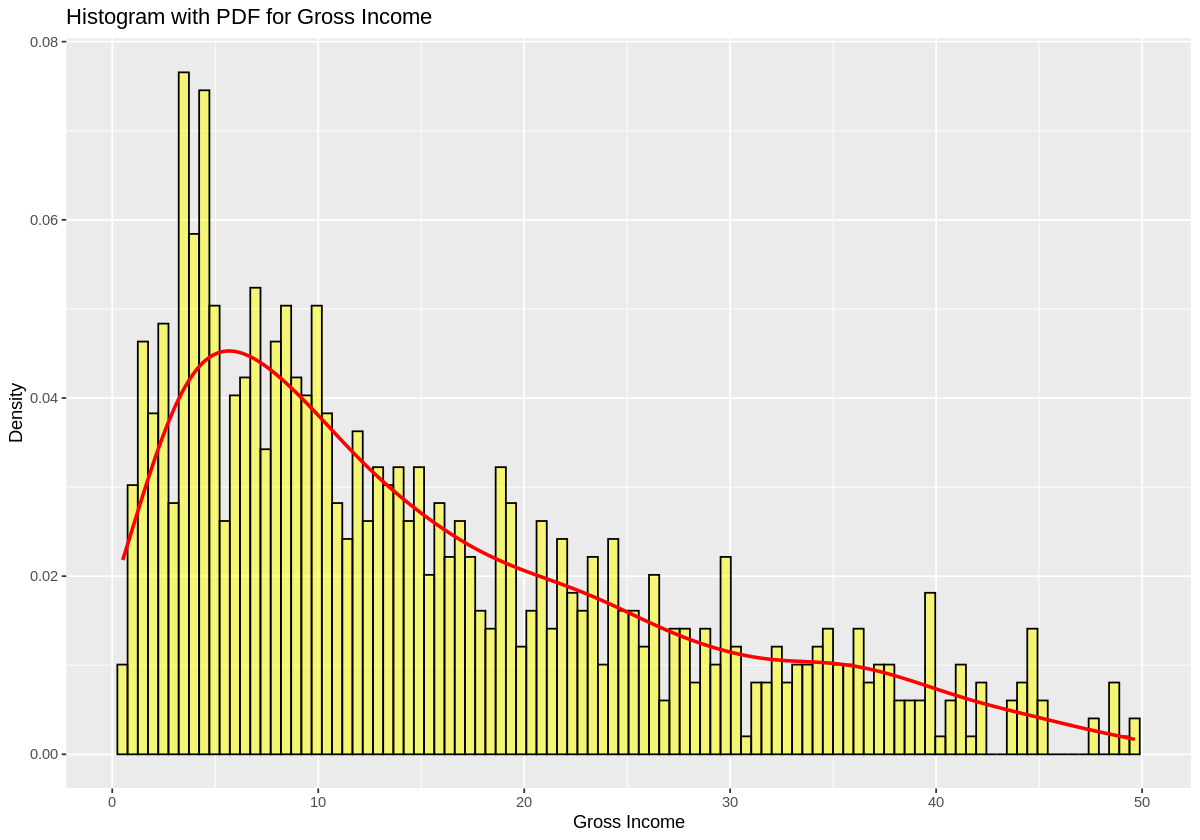

</p>

The analysis reveals a balanced distribution of sales volume across cities, but further exploration is needed to detect potential variations in gross income. A deeper dive into the data will unveil any discrepancies in financial performances and customer satisfaction among the cities. The graph illustrating gender and product line preferences hints at a relationship that statistical tests can verify, highlighting the significant differences. The pie chart showcases product category distribution in the supermarket store across different cities, helping in understanding which products category are favored the most. But , the chart appears symmetrical, indicating no specific customer preferences.

Moreover, the density graph displaying a Poisson distribution aids in comprehending gross income distribution patterns, including central tendencies and probability densities at different income levels. Consistent sales peaks at 7 pm and on Mondays, Fridays, and Saturdays across all branches signify critical customer engagement and transaction periods. This analysis uncovers opportunities for businesses to optimize operations and maximize sales during these peak periods.

In conclusion, this analysis, using different graphs, offers valuable insights into sales distribution, customer preferences, and income patterns across various product categories. These insights are crucial for strategic decision-making, enhancing customer satisfaction, and improving financial performance.

## Inferences from statistical Tests answering our Research Questions :

1. The Intial hypothesis is that there is no significant difference in the purchasing behavior between genders across different product lines. Based on the chi-squared test results with a p-value of 0.3319, we lack evidence to reject the null hypothesis, indicating no significant difference in purchasing behavior between genders and product categories. As such, we explore another hypothesis to understand customer behavior , which is there is no difference in the average number of units purchased from the "Fashion accessories" product line between male and female customers.However, upon analyzing the t-value of approximately -2.1136, degrees of freedom around 164.76, and a p-value of 0.03605, we reject the null hypothesis at the 0.05 significance level. This suggests statistically significant evidence of a true difference in the average units purchased from the "Fashion accessories" product line between male and female customers. This finding gives the importance of gender-specific analysis in retail to tailor marketing strategies and optimize product offerings based on customer preferences and gender.

2. The exploratory data analysis showed balanced sales volume across cities suggests consistent market demand, while deeper analysis is crucial to uncover income variations and assess customer satisfaction for which NPS and Anova is used.The ANOVA results showed with a p-value of 0.413 (>0.05), show no significant difference in average gross income between customers across different cities. This implies consistent and equal profitability among stores, irrespective of their geographical locations.
This suggests that each store performs equally well in terms of average gross income, with no significant variations in profits among the stores. Therefore, all stores demonstrate consistent and significant profitability, regardless of the city in which they are located.The Net Promoter Score (NPS) metric was utilized to evaluate customer sentiment towards products across different cities, providing insights into sales performance and customer preferences among branches. The analysis of confidence intervals for NPS in Yangon, Naypyitaw, and Mandalay revealed key differences. Naypyitaw exhibited higher ratings and customer preference, with a narrow confidence interval indicating consistent positive sentiment and potentially higher sales performance. In contrast, Mandalay showed greater variability and lower bounds in NPS, suggesting areas for improvement in sales and customer satisfaction.While there's no significant difference in gross income across stores, variations in customer ratings suggest a need for improvement in other locations compared to Naypyitaw.

3. The hypothesis to answer this research question is that , there is no difference in the average total sales across the different payment methods.
Since the p-value (0.922) is much greater than the typical significance level of 0.05, we fail to reject the null hypothesis. Thus analysis reveals no significant difference in total sales across various payment methods. However, further exploration considering sample size and data quality may unveil subtle differences, emphasizing the importance of evaluating all payment methods for improved business performance.

4. A linear model was constructed to understand the relationship between Gross Income and various factors such as Rating, Gender, Customer Type, City, Product Line, and Payment Method. Initially, a correlation plot was utilized to identify potential predictors with significant influence on Gross Income. The analysis highlighted three key features: Gross Margin Percentage, Tax 5%, and Cost of Goods Sold (COGS).Subsequently, the model underwent a series of evaluations to ensure its robustness and predictive power. The Durbin-Watson statistic, used to detect autocorrelation in the residuals, indicated a slight positive autocorrelation tendency with a value less than 2. Additionally, a backward selection technique was applied to identify the most significant features contributing to the model's performance. The resulting model showed a remarkably low mean squared prediction error (MSPE) score of 8.969472e-30, signifying its accuracy in predicting Gross Income based on the selected features, i.e ,Gender, Product Category, Total, and Quantity.However, further diagnostic checks revealed certain challenges within the model. Issues such as violation of normality(Q-Q Plot), heteroscedasticity (Scale-Location plot), and the presence of influential outliers (cases 635, 171, and 97) ( Residual Vs Leverage Plot)were observed. These findings suggest that while the model is effective in capturing certain patterns but there are areas that require refinement to enhance its overall predictive capability and reliability like removing the outliers. Addressing these issues will lead to a more accurate and dependable model for understanding the factors affecting Gross Income in the retail context.


## Conclusion

The analysis conducted on the sales data yielded several valuable insights. Firstly, the gender-based analysis revealed no significant differences in purchasing behavior across most product lines, except for the "Fashion accessories" category. This finding highlights the importance of implementing gender-specific marketing strategies, particularly for fashion accessories, to cater to the distinct preferences of male and female customers effectively.
Secondly, the city-wise analysis demonstrated consistent profitability across all branch locations. However, variations in customer ratings were observed, suggesting areas for improvement in certain locations. This information can be leveraged to identify and address specific factors contributing to lower customer satisfaction ratings, ultimately enhancing the overall customer experience.
Thirdly, the analysis of payment methods revealed no significant differences in total sales across various payment options. This finding emphasizes the need for continued consistency and improvement in the facilitation and processing of all payment methods, ensuring optimal business performance and customer convenience.
Finally, the linear model constructed for predicting gross income demonstrated promising predictive power when considering dependent features such as gender, product category, total quantity, and total sales. However, the model requires further refinement to address issues such as normality violations, heteroscedasticity, and influential outliers. By addressing these limitations, the model's accuracy and reliability can be enhanced, providing more robust and actionable insights for informed decision-making.
Overall, the analysis has provided valuable insights into customer behavior, branch performance, payment preferences, and income prediction. By leveraging these findings and addressing identified areas for improvement, the company can implement targeted strategies, enhance customer satisfaction, optimize operational efficiency, and drive business growth.

Based on the insights gained from this analysis, future research can be extended in several directions.
1.  Customer segmentation based on demographic and behavioral data can provide deeper insights into preferences and behaviors.
2. Analyzing specific product categories, conducting market basket analysis, and calculating Customer Lifetime Value (CLV) can enhance understanding of sales dynamics and customer value.
3. Advanced predictive modeling, competitive analysis, and ethical considerations should also be prioritized to ensure sustainable growth and ethical data practices in retail analytics.

## References
1. N. Rukkamate, S. Rodamporn, A. Kanuengkid and K. Kamonlakorn, "Data analytics system for product management in retail business," 2022 1st International Conference on Technology Innovation and Its Applications (ICTIIA), Tangerang, Indonesia, 2022, pp. 1-6, doi: 10.1109/ICTIIA54654.2022.9935948.
keywords: {Analytical models;Technological innovation;Dairy products;Data analysis;Statistical analysis;Linear regression;Predictive models;Web application;Data analytics;Machine learning}.


2. N. R. Tungare and D. G. Jha, "A Framework for Development of Retail Data Analytic App for a Supermarket Chain," 2023 Somaiya International Conference on Technology and Information Management (SICTIM), Mumbai, India, 2023, pp. 112-116, doi: 10.1109/SICTIM56495.2023.10104810.
keywords: {Productivity;Industries;Data analysis;Pricing;Programming;Product design;Quality assessment;Productivity increment;Data Analytics App;Cloud based application in Retail;Modern Retail;Organized Retail inventory control;Cost Optimization in Retail industry}.